# **📊Estudo Analitico sobre Clientes Solicitando Desconexao**

### **✅ Visão Geral do Estudo**

O objetivo deste projeto é realizar análises detalhadas utilizando a base de dados de desconexao consolidada. Desta forma, podemos fornecer padrões, tendências e relações entre as variáveis. Certamente, As análises ajudarão a responder perguntas específicas e fornecerão insights que podem ser utilizados para tomar decisões informadas. Importante salientar, que o projeto utiliza técnicas de Ciência e Análise de dados e atráves disso possamos chegar em melhores resultados e ter um modelo de estudo analitico mais eficiente e que seja mais rentavel para o négocio principal da empresa.

### **✅ Escopo**

Este notebook tem como objetivo a coleta, o pré-processamento e a análise exploratória dos dados utilizados neste projeto. Inicialmente, são realizadas etapas de validação, transformação e organização dos dados, garantindo sua qualidade e consistência. Em seguida, são conduzidas análises descritivas, univariadas e multivariadas, com foco na identificação de padrões, tendências e possíveis correlações entre variáveis. Essa etapa é fundamental para obter uma compreensão aprofundada do conjunto de dados e orientar decisões nas fases subsequentes do projeto.



---

## **Importação das Bibliotecas**

Realização da ação de importação de determinadas bibliotecas da linguagem Python, trazendo diversos benefícios para o projeto. Dentre eles:

* Melhora na eficiência e na qualidade do código.
* Economizando tempo.
* Permitem alterações no código a realização de determinadas ações de forma modular.

As bibliotecas importadas foram:

* **PANDAS:** Para manipulação e análise de dados tabulares.
* **NUMPY:** Operações matemáticas e arrays multidimensionais.
* **SEABORN:** Visualizações estatísticas avançadas.
* **MATPLOTLIB:** Importada para realizarmos visualizações e gráficos focado em dados.
* **SKLEARN:** Útil para Machine Learning e modelagem do modelo com métodos que facilita o desenvolvimento.
* **Pyodbc** Utilizada para que a coleta de dados atráves do banco de dados possa acontecer com eficiência

In [1]:
import pandas as pd
import numpy as np
import openpyxl as px
import matplotlib as plt
import seaborn as sns
import pyodbc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## **1. Coleta dos Dados**

**Introdução**

Nesta seção, é realizado a coleta dos dados necessários para a análise. Utilizaremos a biblioteca **pyodbc** para estabelecer uma conexão com o banco de dados **SQL Server** e executar uma consulta SQL que retorna informações detalhadas sobre os clientes que solicitaram a desconexão.

**Detalhes**

* **Banco de Dados:** BDS

* **Nome da tabela utilizada:** VW_ATENDIMENTO_ORDEM_DESCONEXAO_CONSOLIDADO

* **Descrição da Tabela:** View que temos armazenado as ordens de solicitação de desconexão do canal de atendimento, e é gerada atráves da base de dados TB_ATENDIMENTO_ORDEM_DESCONEXAO_CONSOLIDADO.

**Descrição dos Dados**

* **Quantidade de Features:** 15

* **Período da Base:** Janeiro de 2025 até Abril de 2025 (3 meses)

* **Nível de Granularidade:** Mensal

* **Detalhamento das Features:**

| Nome da Coluna       | Descrição       |                                  
|------------------|----------------
| CÓDIGO_CONTRATO              | Código do Contrato do Cliente     
| CPF_CNPJ_CLIENTE            | CPF ou CNPJ daquele Cliente           
| TECNOLOGIA        | Tecnologia que ele utiliza do produto de banda larga               
| UF     | Estado         
| DATA_INSTALACAO   | Data da Instalação do produto daquele cliente
| FLAG_EXISTE_ORDEM_DESCONEXAO                 | Se já existe uma ordem de desconexão
| ORIGEM_SOLICITACAO                |  Canal de atendimento que ocorreu essa solicitação de desconexão
| TIPO_SOLICITACAO                 |  Atendimento Humano ou Automático
| DATA_CRIACAO               | Data da Criação da solicitação de desconexão
| MOTIVO_AGRUPADO_MACRO                 | Motivo Agrupado Resumido
| MOTIVO_AGRUPADO_MICRO                 | Motivo Agrupado Detalhamento
| QUANTIDADE_PROTOCOLOS                   | Quantidade de Protocolos abertos pra aquele cliente
| FLG_RETIDO                | Se aquele cliente foi retido ou não
| FL_RISCO                 | Se aquele cliente corre o risco de perdemos ele na base e solicitar uma desconexão novamente
| MESES_AGING_BASE                   |  Quantidade de meses que ficou na base de clientes até solicitar uma ordem de desconexão

In [2]:
import pyodbc

try:
    conn = pyodbc.connect(
        'Driver={ODBC Driver 17 for SQL Server};'
        'Server=SNEPDB56C01;'
        'Database=BDS;'
        'Trusted_Connection=yes;'
    )

    query = """
    SELECT 
        COD_CONTRATO AS CÓDIGO_CONTRATO,
        NUM_CPF_CNPJ_CLIENTE AS CPF_CNPJ_CLIENTE,
        TECNOLOGIA AS TECNOLOGIA,
        UF,
        DT_INSTALACAO AS DATA_INSTALACAO,
        AGING_DIAS_GROSS_CHURN AS DIAS_BASE_CHURN,
        FL_EXISTE_ORDEM_DESCONEXAO AS FLAG_ORDEM_DESCONEXAO,
        ORIGEM_SOLICITACAO AS ORIGEM_SOLICITACAO,
        TIPO_SOLICITACAO AS TIPO_SOLICITACAO,
        MAX_DATA_CRIACAO_SR AS DATA_CRIACAO,
        MAX_MOTIVO_MACRO_MINI_CRM AS MOTIVO_CANCELAMENTO_VISAO_MACRO,   
        MAX_MOTIVO_CANC_MINI_CRM AS MOTIVO_CANCELAMENTO_VISAO_MICRO,
        QTD_PROTOCOLOS AS QUANTIDADE_PROTOCOLOS,
        FLG_RETIDO AS FLAG_RETIDO,
        MESES_AGING_BASE
    FROM 
        VW_ATENDIMENTO_ORDEM_DESCONEXAO_CONSOLIDADO
    WHERE
	    MAX_DATA_CRIACAO_SR between '2025-01-01' AND '2025-04-30' 
	    AND MAX_MOTIVO_CANC_MINI_CRM IS NOT NULL
	    AND MAX_MOTIVO_MACRO_MINI_CRM IS NOT NULL
    ORDER BY 
	    DATA_INSTALACAO DESC
"""
    Base_Clientes_Desconexao_Detalhado = pd.read_sql(query, conn)

    print(Base_Clientes_Desconexao_Detalhado.head())  

finally:
    conn.close() 
    print("Conexão encerrada.")

C:\Users\F8090067\AppData\Local\Temp\ipykernel_20984\757550758.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Base_Clientes_Desconexao_Detalhado = pd.read_sql(query, conn)


  CÓDIGO_CONTRATO  CPF_CNPJ_CLIENTE TECNOLOGIA  UF DATA_INSTALACAO  \
0       355490145       88285162168       FTTH  GO      2025-04-30   
1       355492103        6683067937       FTTH  PR      2025-04-30   
2       355492454        5259110498       FTTH  PE      2025-04-30   
3       355441775        5086113180       FTTH  DF      2025-04-30   
4       355438536       84341327291       FTTH  AM      2025-04-29   

   DIAS_BASE_CHURN  FLAG_ORDEM_DESCONEXAO ORIGEM_SOLICITACAO TIPO_SOLICITACAO  \
0              0.0                      1        ATENDIMENTO           HUMANO   
1              0.0                      0        ATENDIMENTO           HUMANO   
2              0.0                      0        ATENDIMENTO           HUMANO   
3              0.0                      0        ATENDIMENTO           HUMANO   
4              1.0                      0        ATENDIMENTO           HUMANO   

  DATA_CRIACAO MOTIVO_CANCELAMENTO_VISAO_MACRO  \
0   2025-04-30                 PRODUTO_SER

## **2. Validações da Base de Dados** 

**Introdução**

Realização de diferentes tipos de validações na base de dados. Desta forma, a validação é crucial para garantir a qualidade dos dados antes de prosseguir com a análise. Vamos abordar três aspectos principais:

1. Identificação de valores nulos

2.  Identificação de valores duplicados

3. Verificação dos tipos de dados das colunas


**Explicação das Etapas**

1. Nesta etapa, vamos identificar as colunas que contêm valores nulos. A presença de dados missing indicam que a base possui alguns tipos de inconsistências em determinadas linhas. Neste sentido, identificar e realizar a tratativa desses valores se torna importante para garantir a integridade dos dados.

2. Verificar a presença de registro duplicados se torna fundamental para compreendermos se isso é uma anomalia ou algo que já era esperado dentro da base que estamos trabalhando.

3. Verificar os tipos de dados das colunas é importante para garantir que cada coluna contenha o tipo de dado esperado. Por exemplo, colunas que deveriam contem valores numéricos não devem ter valores de texto e aquelas do tipo Data não podem estar como texto ou inteiro. Certamente, está validação auxilia para encontrarmos problemas de formatação ou inconsistências de quando trazemos os dados para um df do python.

**Benefícios**

Os benefícios desta etapa incluem:

* **Confiabilidade:** Aumentar a confiabilidade dos resultados da análise.
* **Eficiência:** Identificar problemas nos dados de forma antecipada, economizando tempo nas etapas subsequentes.

### **2.1 Identificação de Valores Nulos e Duplicados**

C:\Users\F8090067\AppData\Local\Temp\ipykernel_20816\1966798853.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(nulos_por_coluna.index, rotation=45, ha='right')
C:\Users\F8090067\AppData\Local\Temp\ipykernel_20816\1966798853.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(contagem.index, rotation=0)


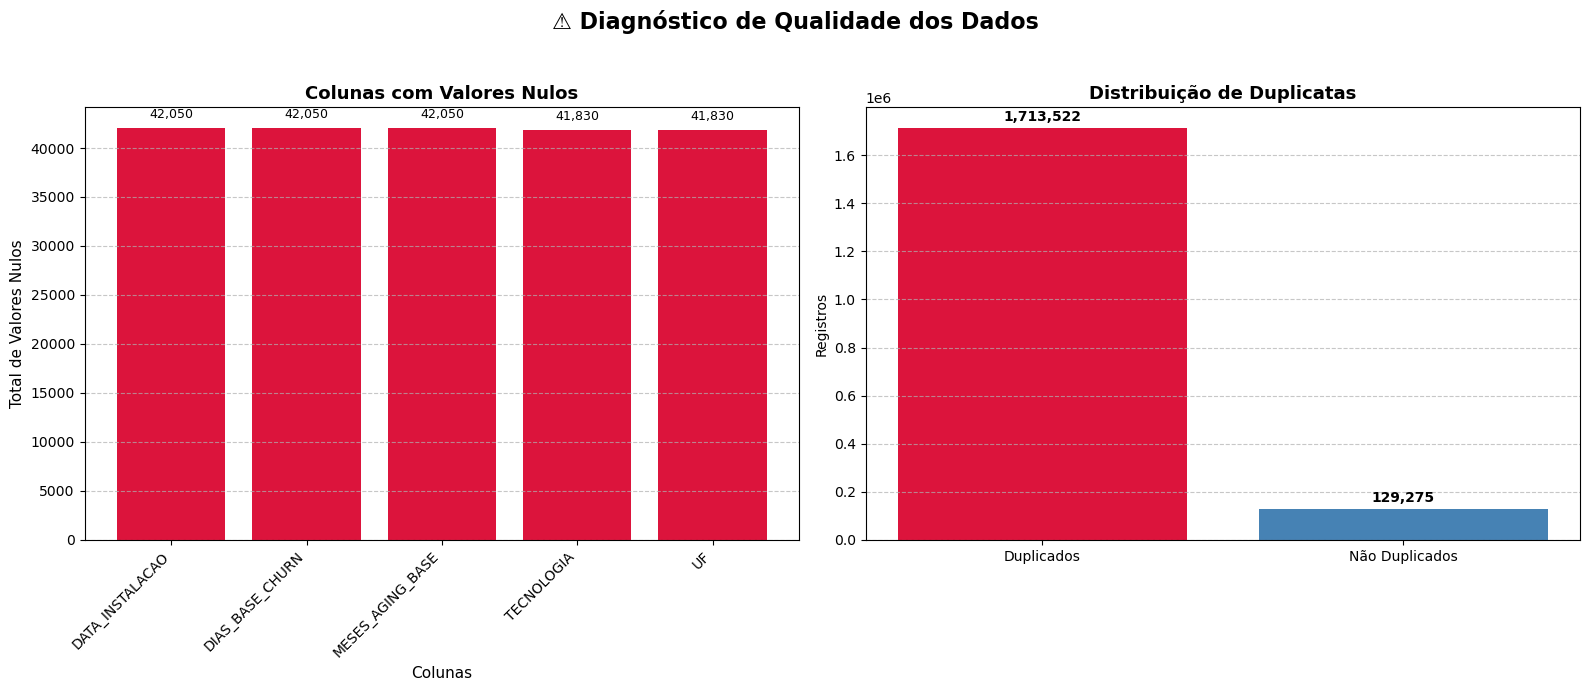

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que a base já está carregada como Base_Clientes_Desconexao_Detalhado

# ==============================
# Gráfico 1 - Valores Nulos
# ==============================

# Obter colunas com valores nulos
nulos_por_coluna = Base_Clientes_Desconexao_Detalhado.isnull().sum()
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0].sort_values(ascending=False)

# ==============================
# Gráfico 2 - Duplicados
# ==============================

# Contagem de duplicados
total_duplicados = Base_Clientes_Desconexao_Detalhado.duplicated().sum()

contagem = pd.Series({
    'Duplicados': total_duplicados,
    'Não Duplicados': len(Base_Clientes_Desconexao_Detalhado) - total_duplicados
})

# ==============================
# Criação da Figura com Subplots
# ==============================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# -----------------
# Plot 1 - Nulos
# -----------------
bars = ax1.bar(nulos_por_coluna.index, nulos_por_coluna.values, color='crimson')

# Títulos
ax1.set_title('Colunas com Valores Nulos', fontsize=13, fontweight='bold')

# Eixos
ax1.set_xlabel('Colunas', fontsize=11)
ax1.set_ylabel('Total de Valores Nulos', fontsize=11)
ax1.set_xticklabels(nulos_por_coluna.index, rotation=45, ha='right')

# Labels nas barras
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:,}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=9, color='black')

# Grade horizontal
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)

# -----------------
# Plot 2 - Duplicados
# -----------------
bars2 = ax2.bar(contagem.index, contagem.values, color=['crimson', 'steelblue'])

# Títulos
ax2.set_title('Distribuição de Duplicatas', fontsize=13, fontweight='bold')

# Eixos
ax2.set_ylabel('Registros')
ax2.set_xticklabels(contagem.index, rotation=0)

# Labels nas barras
for i, v in enumerate(contagem.values):
    ax2.text(i, v + max(contagem)*0.01, 
             f'{v:,}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.yaxis.grid(True, linestyle='--', alpha=0.7)

# -----------------
# Título Geral
# -----------------
plt.suptitle('⚠️ Diagnóstico de Qualidade dos Dados', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


## **3. Processamento**


**Introdução**

O processamento de dados é uma etapa crucial para garantir que os dados estejam no formato adequado para as análises e modelagens que vão ser futuramente realizadas. Aqui foi aplicado duas tarefas principais:

1. Conversão do tipo de dado da coluna DIAS_BASE_CHURN

2. Remoção dos valores nulos

**Explicação das Etapas**

1. A coluna **DIAS_BASE_CHURN** contém valores numéricos que representam os dias que o cliente permaneceu na base até a data que abriu a sua solicitação de desconexão. Inicialmente, esses valores estão no formato float, mas para garantir a consistência dos dados, convertemos eles para o formato int64. Isto é uma prática comum para garantir que os dados estejam no formato adequado para operações matemáticas e estatísticas.

2. Os valores nulos presentes na base estavam focalizados nas colunas DATA_INSTALACAO, TECNOLOGIA, DIAS_BASE_CHURN, MESES_AGING_BASE, UF e com isso pude identificar um padrão nesses valores que seria: Se não havia a presença do valor na DATA_INSTALACAO automaticamente as colunas de DIAS_BASE_CHURN e MESES_AGING_BASE também iriam ter seus valores nulos pelo fato de que elas dependem da data da instalacao para conseguir calcular o tempo que ele permaneceu na base e um outro padrão é de que se a TECNOLOGIA do cliente também estivesse como nulo a sua UF não poderia ser localizada. Neste sentido, esses insights extraídos foram fundamentais para tomar a melhor decisão para a tratativa desses valores nulos e então foi realizado a remoção desses valores pois se tratava de valores especificos e que não representavam todas a base tendo um percentual de representativade muito abaixo.

**Benefícios**

Os benefícios desta etapa incluem:

* **Consistência:** Garantia de que os dados estejam no formato adequado para as análises realizadas futuramente.

* **Qualidade:** Remover valores nulos melhora a qualidade dos dados e a precisão das análises.

* **Eficiência:** Dados devidamente processados facilitam a criação das análises e a construção de modelos preditivos.

### **3.1 Conversão do Tipo de Dado**

In [ ]:
Base_Clientes_Desconexao_Detalhado['DIAS_BASE_CHURN'] = Base_Clientes_Desconexao_Detalhado['DIAS_BASE_CHURN'].astype('Int64')

Base_Clientes_Desconexao_Detalhado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842797 entries, 0 to 1842796
Data columns (total 15 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   CÓDIGO_CONTRATO                  object        
 1   CPF_CNPJ_CLIENTE                 int64         
 2   TECNOLOGIA                       object        
 3   UF                               object        
 4   DATA_INSTALACAO                  object        
 5   DIAS_BASE_CHURN                  Int64         
 6   FLAG_ORDEM_DESCONEXAO            int64         
 7   ORIGEM_SOLICITACAO               object        
 8   TIPO_SOLICITACAO                 object        
 9   DATA_CRIACAO                     datetime64[ns]
 10  MOTIVO_CANCELAMENTO_VISAO_MACRO  object        
 11  MOTIVO_CANCELAMENTO_VISAO_MICRO  object        
 12  QUANTIDADE_PROTOCOLOS            int64         
 13  FLAG_RETIDO                      int64         
 14  MESES_AGING_BASE                 o

In [5]:
print(Base_Clientes_Desconexao_Detalhado['DIAS_BASE_CHURN'])


0             0
1             0
2             0
3             0
4             1
           ... 
1842792    <NA>
1842793    <NA>
1842794    <NA>
1842795    <NA>
1842796    <NA>
Name: DIAS_BASE_CHURN, Length: 1842797, dtype: Int64


## **4. Análises Descritivas e Explorátorias**

**Introdução**

Realização de análises descritivas e exploratórias dos dados coletados e processados nas etapas anteriores. As análises descritivas e exploratórias são fundamentais para entender melhor os dados, identificar padrõres e gerar insights iniciais que podem orientar as próximas etapas do projeto.

**Análises Cancelamento de Clientes**

Iremos analisar os dados relacionados ao cancelamento de clientes. Isso inclui identificar a taxa de retenção dos clientes que solicitaram desconexão, qual seria o principal motivo relacionado a desconexão (cancelamento), a relação de cancelamento com as demais features como UF, TECNOLOGIA e AGING_MESES_BASE.

**Análise de Retenção de Clientes**

Além de analisar os cancelamentos, é importante entender os fatores que contribuem para a retenção de clientes. Neste sentido, o objetivo é identificar os fatores que contribuem para à retenção de um determinado cliente. Certamente, esse tipo de análise ajudará a identificar estratégias eficazes para manter os clientes e reduzir a taxa de desconexão. 

**Análises Operacionais**

As análises operacionais são importantes para entender o desempenho e a eficiência das operações relacionadas ao atendimento e à desconexão de clientes. Nesta etapa, vamos analisar dados como a quantidade de protocolos gerados, tempo em dias que o cliente permaneceu na base. Essas visões ajudarão a identificar possíveis gargalos e áreas de melhorias no atendimento, contribuindo para uma melhor experiência do cliente.





### **4.1 Análises de Cancelamento**

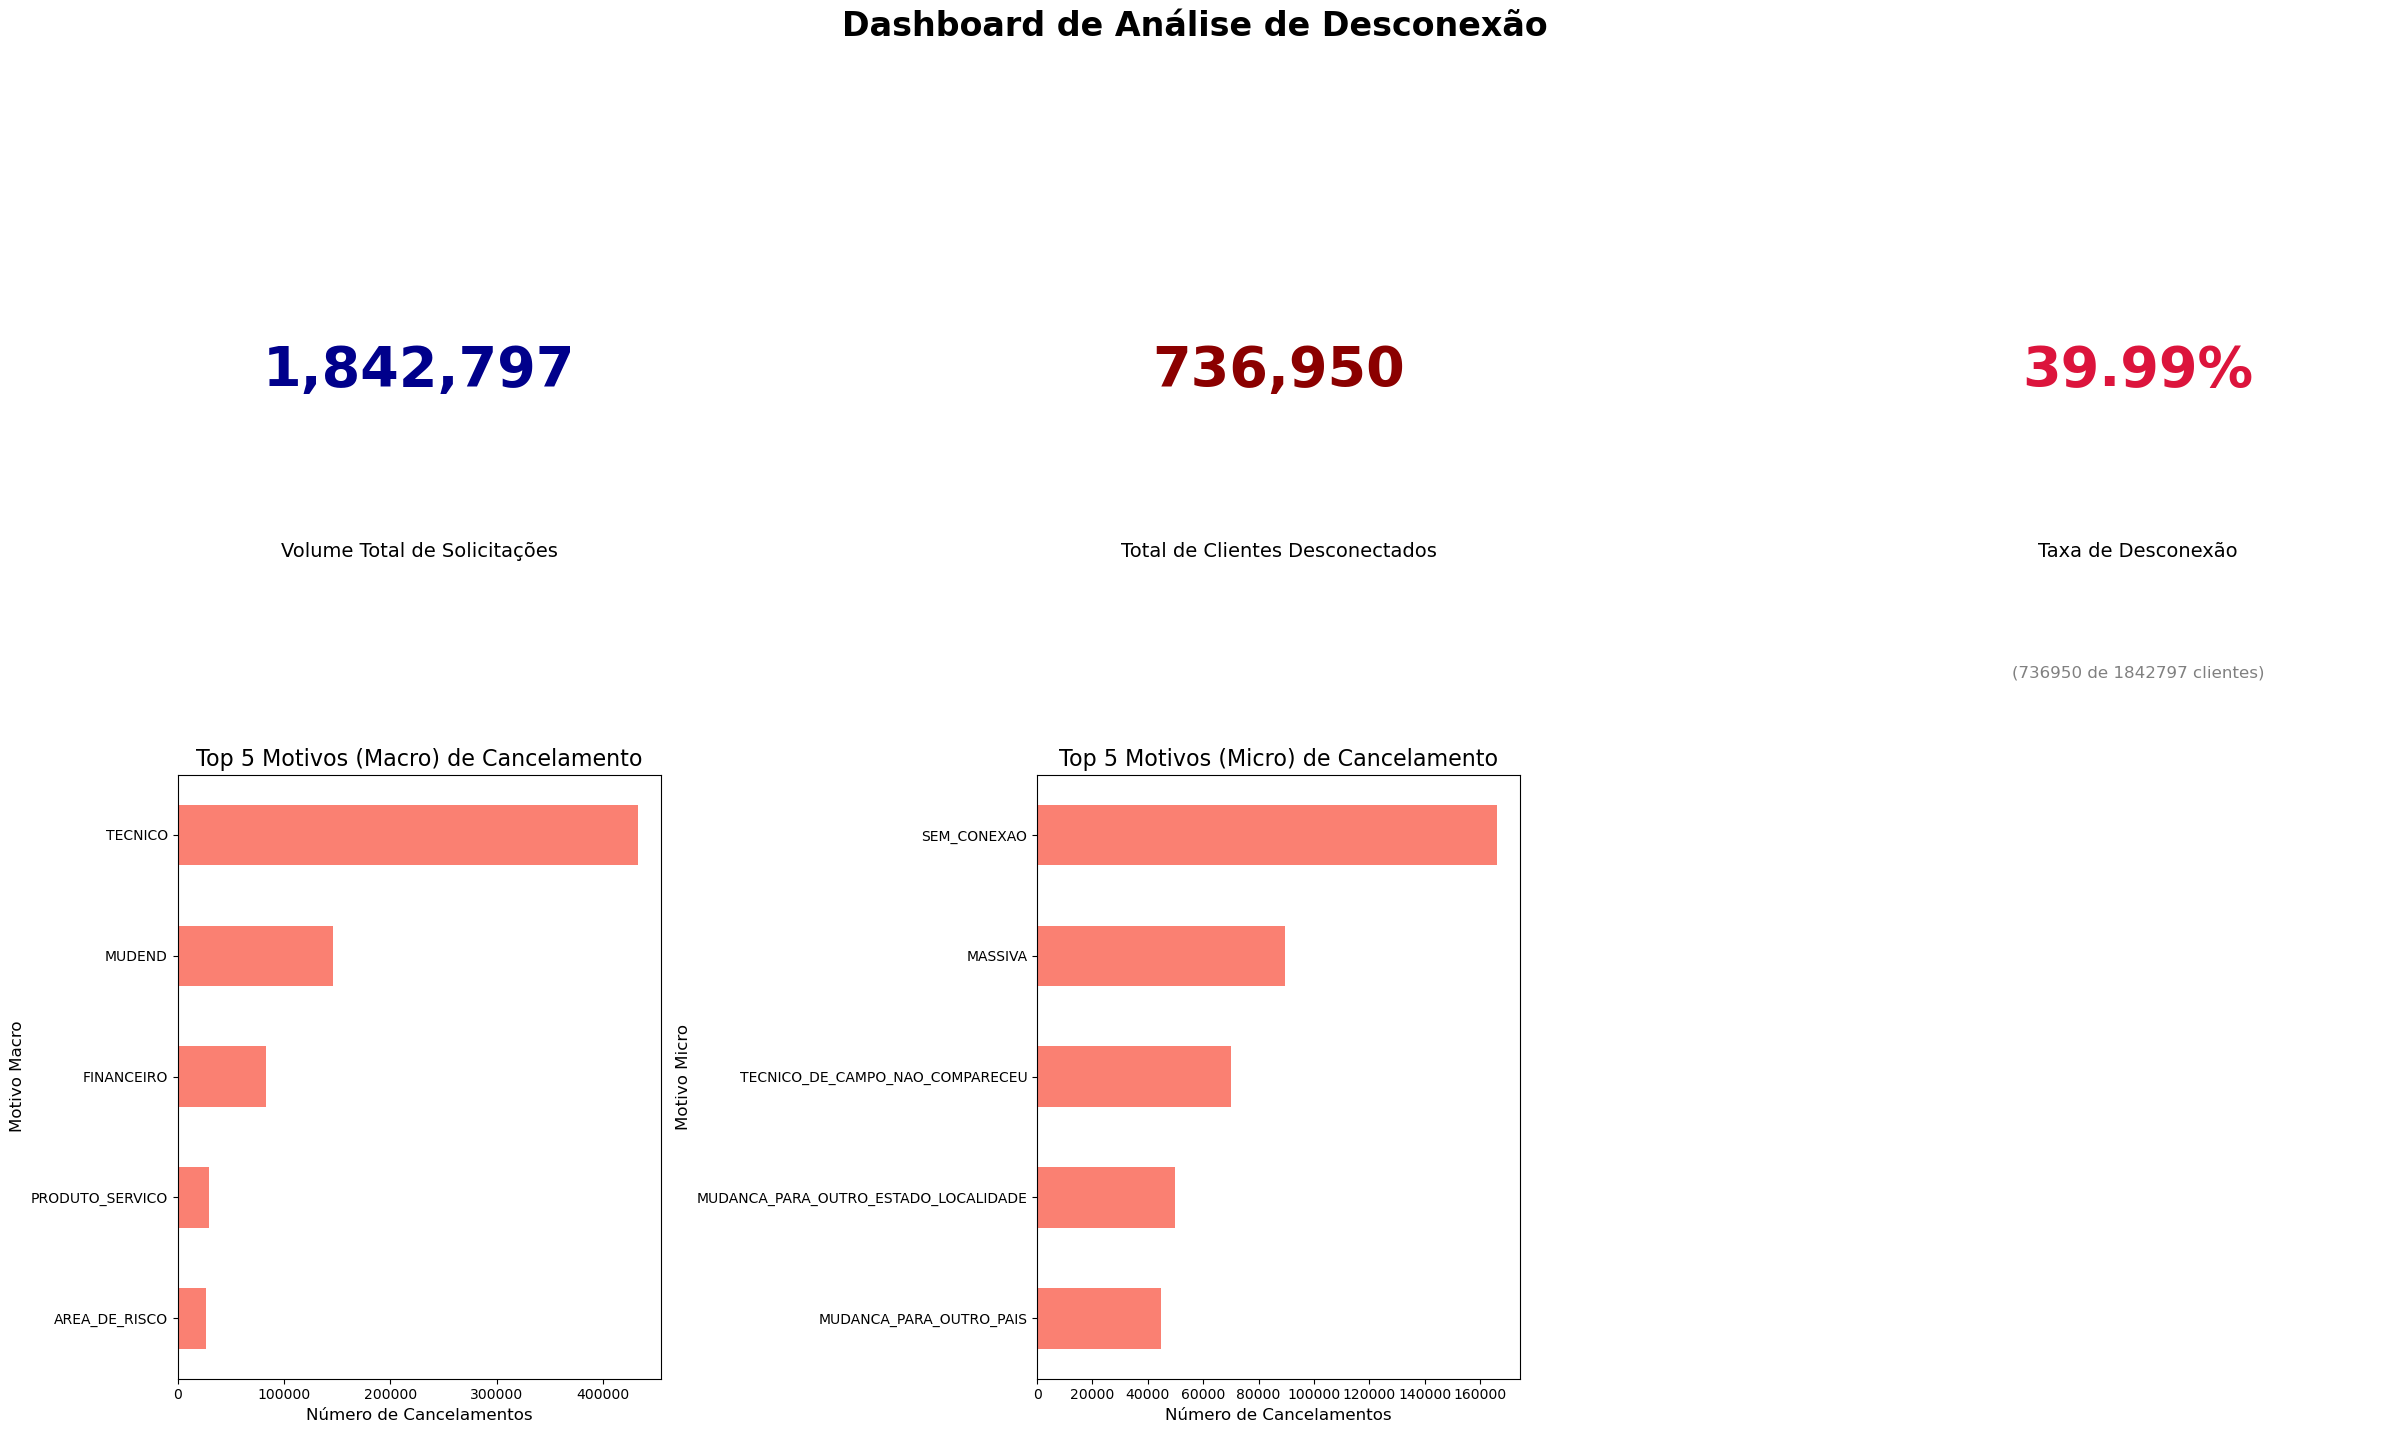

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt


# Filtrar apenas os clientes que realmente cancelaram
cancelados = Base_Clientes_Desconexao_Detalhado[Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 0]

# --- Cálculo das Métricas para os Cards ---
total_solicitacoes = len(Base_Clientes_Desconexao_Detalhado)
total_desconectados = cancelados.shape[0]
taxa_desconexao = (total_desconectados / total_solicitacoes) * 100

# --- Preparação dos Dados para os Gráficos de Motivos ---
frequencias_macro = cancelados['MOTIVO_CANCELAMENTO_VISAO_MACRO'].value_counts()
frequencias_micro = cancelados['MOTIVO_CANCELAMENTO_VISAO_MICRO'].value_counts()

# --- Função para Criar um Card (Reutilizada) ---
def create_metric_card(ax, value, title, subtitle="", value_fontsize=32, title_fontsize=14, subtitle_fontsize=12, value_color='royalblue'):
    ax.axis('off')
    ax.text(0.5, 0.6,
            value,
            fontsize=value_fontsize, fontweight='bold', color=value_color,
            ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 0.3,
            title,
            fontsize=title_fontsize, ha='center', va='center', transform=ax.transAxes)
    if subtitle:
        ax.text(0.5, 0.1,
                subtitle,
                fontsize=subtitle_fontsize, color='gray', ha='center', va='center', transform=ax.transAxes)

# --- Criação da Figura e Subplots ---
# Layout: 2 linhas, 3 colunas (3 cards na primeira linha, 2 gráficos na segunda)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 14))
fig.suptitle('Dashboard de Análise de Desconexão', fontsize=24, fontweight='bold', y=1.02)

# Flatten o array de eixos para facilitar a iteração
axes = axes.flatten()

# --- Plotando os Cards (Primeira Linha) ---

# Card 1: Total de Solicitações
create_metric_card(
    ax=axes[0],
    value=f'{total_solicitacoes:,}',
    title='Volume Total de Solicitações',
    value_fontsize=40,
    value_color='darkblue' # Cor individual, OK aqui
)

# Card 2: Total de Desconectados
create_metric_card(
    ax=axes[1],
    value=f'{total_desconectados:,}',
    title='Total de Clientes Desconectados',
    value_fontsize=40,
    value_color='darkred' # Cor individual, OK aqui
)

# Card 3: Taxa de Desconexão
create_metric_card(
    ax=axes[2],
    value=f'{taxa_desconexao:.2f}%',
    title='Taxa de Desconexão',
    subtitle=f'({total_desconectados} de {total_solicitacoes} clientes)',
    value_fontsize=40,
    value_color='crimson' # Cor individual, OK aqui
)

# --- Plotando os Gráficos (Segunda Linha) ---

# Gráfico 4: Top 5 Motivos (Macro) de Cancelamento
frequencias_macro.head(5).sort_values().plot(kind='barh', color='salmon', ax=axes[3])
axes[3].set_title('Top 5 Motivos (Macro) de Cancelamento', fontsize=16)
axes[3].set_xlabel('Número de Cancelamentos', fontsize=12)
axes[3].set_ylabel('Motivo Macro', fontsize=12)
axes[3].tick_params(axis='x', rotation=0) # Garante que os labels do X não rodem se forem números
axes[3].tick_params(axis='y', labelsize=10) # Ajuste o tamanho da fonte dos labels Y

# Gráfico 5: Top 5 Motivos (Micro) de Cancelamento
frequencias_micro.head(5).sort_values().plot(kind='barh', color='salmon', ax=axes[4])
axes[4].set_title('Top 5 Motivos (Micro) de Cancelamento', fontsize=16)
axes[4].set_xlabel('Número de Cancelamentos', fontsize=12)
axes[4].set_ylabel('Motivo Micro', fontsize=12)
axes[4].tick_params(axis='x', rotation=0)
axes[4].tick_params(axis='y', labelsize=10)

# --- Lidar com o Subplot Vazio ---
# Ocultar o último subplot (axes[5]) que ficará vazio
axes[5].axis('off')

# Ajustar o layout e espaçamento entre os subplots
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout, deixando espaço para o suptitle
plt.show()

C:\Users\F8090067\AppData\Local\Temp\ipykernel_20816\593575050.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_cancelamentos_por_uf.index,
C:\Users\F8090067\AppData\Local\Temp\ipykernel_20816\593575050.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


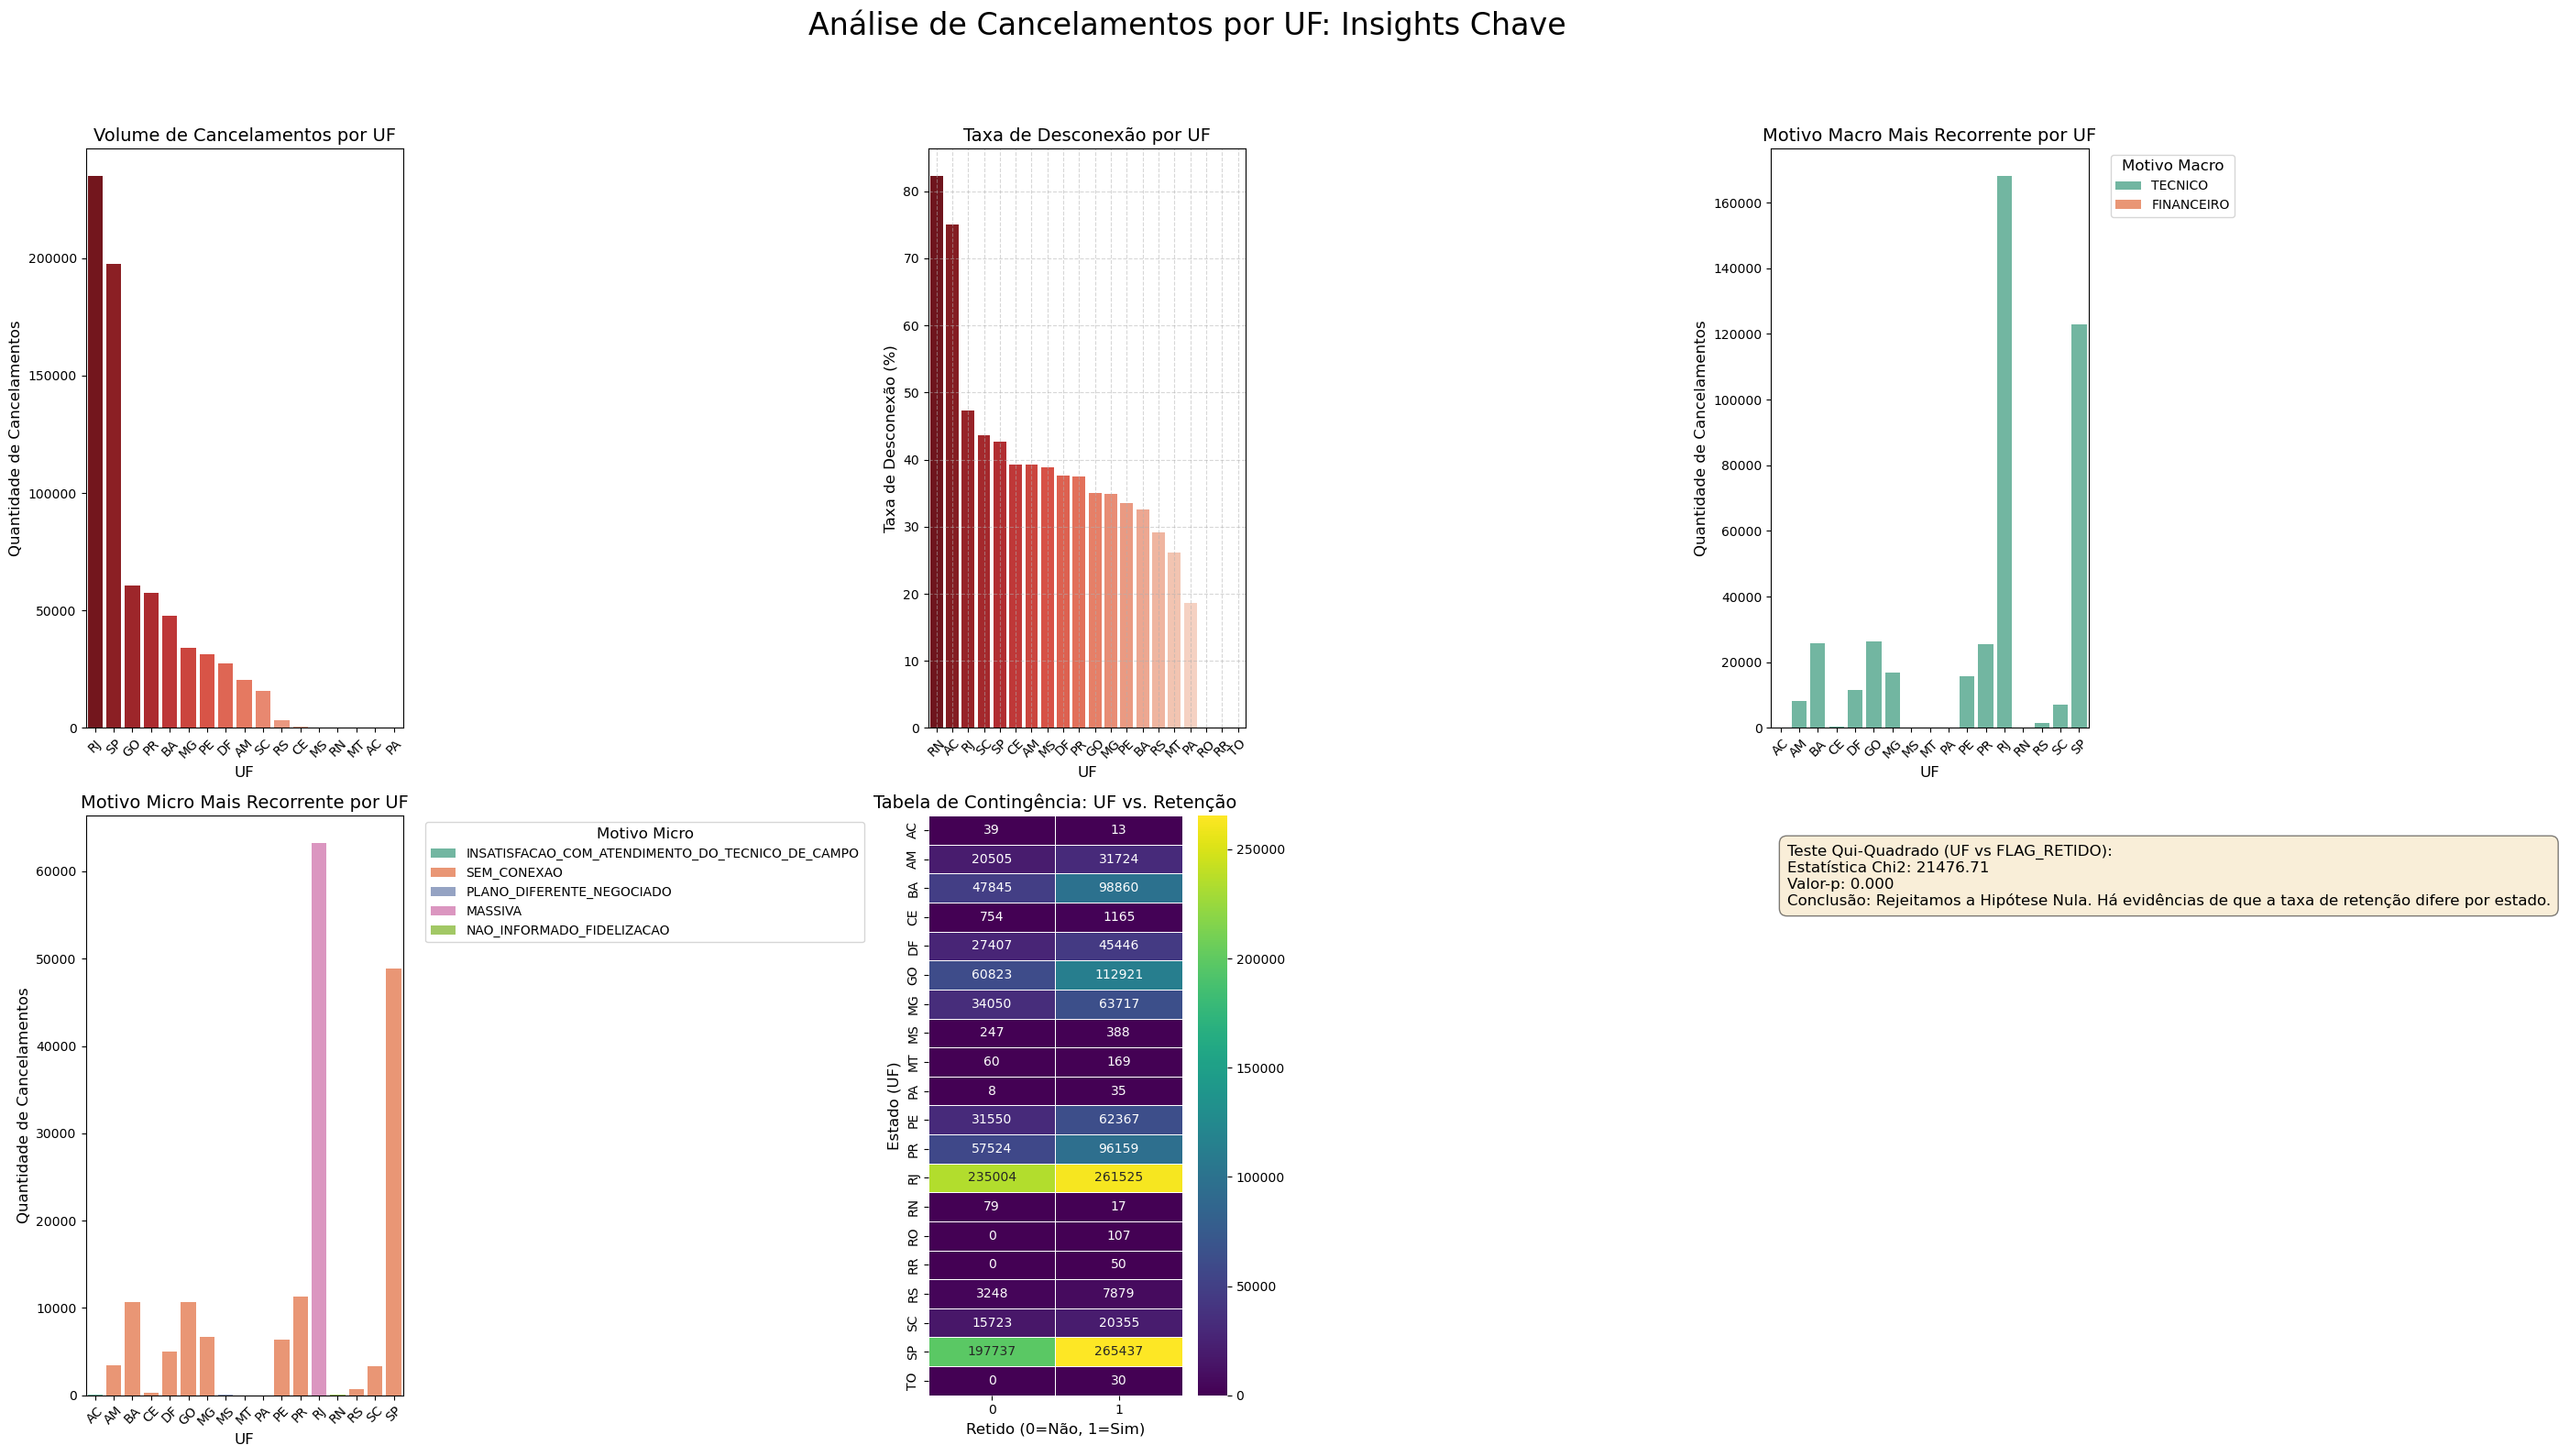




Teste Qui-Quadrado (UF vs FLAG_RETIDO) - Detalhes no console:
Estatística Chi2: 21476.71
Valor-p: 0.000
Conclusão: Rejeitamos a Hipótese Nula. Há evidências de que a taxa de retenção e desconexão difere por estado.




In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency


cancelamentos = Base_Clientes_Desconexao_Detalhado[Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 0]

# --- Preparação dos Dados para os Gráficos ---

# 1. Volume de Cancelamentos por UF
contagem_cancelamentos_por_uf = cancelamentos['UF'].value_counts()

# 2. Taxa de Desconexão por UF
total_por_uf = Base_Clientes_Desconexao_Detalhado.groupby('UF').size().reset_index(name='Total_Solicitacoes')
cancelados_por_uf = Base_Clientes_Desconexao_Detalhado[
    Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 0
].groupby('UF').size().reset_index(name='Cancelados')
taxa_desconexao_uf = pd.merge(total_por_uf, cancelados_por_uf, on='UF', how='left')
taxa_desconexao_uf['Cancelados'] = taxa_desconexao_uf['Cancelados'].fillna(0)
taxa_desconexao_uf['Taxa de Desconexao (%)'] = (
    taxa_desconexao_uf['Cancelados'] / taxa_desconexao_uf['Total_Solicitacoes'] * 100
).round(2)

# 3. Motivo Macro de Cancelamento Mais Recorrente por UF
Motivos_Macros_Agrupados = cancelamentos.groupby(['UF', 'MOTIVO_CANCELAMENTO_VISAO_MACRO']).size().reset_index(name='Quantidade')
Motivo_Macro_Principal = Motivos_Macros_Agrupados.loc[
    Motivos_Macros_Agrupados.groupby('UF')['Quantidade'].idxmax()
].reset_index(drop=True)

# 4. Motivo Micro de Cancelamento Mais Recorrente por UF
Motivos_Micros_Agrupados = cancelamentos.groupby(['UF', 'MOTIVO_CANCELAMENTO_VISAO_MICRO']).size().reset_index(name='Quantidade')
Motivo_Micro_Principal = Motivos_Micros_Agrupados.loc[
    Motivos_Micros_Agrupados.groupby('UF')['Quantidade'].idxmax()
].reset_index(drop=True)

# 5. Tabela de Contingência (Heatmap)
tabela_contigencia = pd.crosstab(Base_Clientes_Desconexao_Detalhado['UF'], Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'])

# --- Criação dos Subplots ---
# Definir a figura e os eixos para 2 linhas e 3 colunas
# Aumentar o figsize para dar mais espaço. Ajuste conforme sua tela e preferência.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26, 16))
fig.suptitle('Análise de Cancelamentos por UF: Insights Chave', fontsize=24, y=1.02) # Título geral da figura

# Flatten o array de eixos para facilitar a iteração se tiver mais de uma linha/coluna
axes = axes.flatten()

# --- Plotando os Gráficos em Cada Subplot ---

# Gráfico 1: Volume de Cancelamentos por UF
sns.barplot(x=contagem_cancelamentos_por_uf.index,
            y=contagem_cancelamentos_por_uf.values,
            palette='Reds_r', ax=axes[0])
axes[0].set_title('Volume de Cancelamentos por UF', fontsize=14)
axes[0].set_xlabel('UF', fontsize=12)
axes[0].set_ylabel('Quantidade de Cancelamentos', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Taxa de Desconexão por UF
sns.barplot(
    x='UF',
    y='Taxa de Desconexao (%)',
    data=taxa_desconexao_uf.sort_values(by='Taxa de Desconexao (%)', ascending=False),
    palette='Reds_r', ax=axes[1]
)
axes[1].set_title('Taxa de Desconexão por UF', fontsize=14)
axes[1].set_xlabel('UF', fontsize=12)
axes[1].set_ylabel('Taxa de Desconexão (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Gráfico 3: Motivo Macro de Cancelamento Mais Recorrente por UF
sns.barplot(
    data=Motivo_Macro_Principal,
    x='UF',
    y='Quantidade',
    hue='MOTIVO_CANCELAMENTO_VISAO_MACRO',
    dodge=False,
    palette='Set2', ax=axes[2]
)
axes[2].set_title('Motivo Macro Mais Recorrente por UF', fontsize=14)
axes[2].set_xlabel('UF', fontsize=12)
axes[2].set_ylabel('Quantidade de Cancelamentos', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Motivo Macro', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Gráfico 4: Motivo Micro de Cancelamento Mais Recorrente por UF
sns.barplot(
    data=Motivo_Micro_Principal,
    x='UF',
    y='Quantidade',
    hue='MOTIVO_CANCELAMENTO_VISAO_MICRO',
    dodge=False,
    palette='Set2', ax=axes[3]
)
axes[3].set_title('Motivo Micro Mais Recorrente por UF', fontsize=14)
axes[3].set_xlabel('UF', fontsize=12)
axes[3].set_ylabel('Quantidade de Cancelamentos', fontsize=12)
axes[3].tick_params(axis='x', rotation=45)
axes[3].legend(title='Motivo Micro', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Gráfico 5: Tabela de Contingência (Heatmap)
sns.heatmap(tabela_contigencia, annot=True, cmap='viridis', fmt='d', linewidths=.5, ax=axes[4])
axes[4].set_title('Tabela de Contingência: UF vs. Retenção', fontsize=14)
axes[4].set_xlabel('Retido (0=Não, 1=Sim)', fontsize=12)
axes[4].set_ylabel('Estado (UF)', fontsize=12)
axes[4].tick_params(axis='x', rotation=0) # Rotação 0 para os labels de 0 e 1


# --- Adicionar o resultado do Teste Qui-Quadrado como texto na figura ---
chi2, p_valor, dof, expected = chi2_contingency(tabela_contigencia)

if p_valor < 0.05:
    conclusion = "Rejeitamos a Hipótese Nula. Há evidências de que a taxa de retenção difere por estado."
else:
    conclusion = "Não rejeitamos a Hipótese Nula. Não há evidências de que a taxa de churn difere significativamente por estado."

# Formata o texto para exibição
chi2_text = (
    f"Teste Qui-Quadrado (UF vs FLAG_RETIDO):\n"
    f"Estatística Chi2: {chi2:.2f}\n"
    f"Valor-p: {p_valor:.3f}\n"
    f"Conclusão: {conclusion}"
)

# Coloca o texto no último subplot vazio (ou em um local estratégico)
# Se houver um subplot vazio, usaremos ele. Se não, podemos colocá-lo em um espaço livre.
# Neste caso, o último subplot é o axes[5]
if len(axes) > 5:
    axes[5].text(0.05, 0.95, chi2_text, transform=axes[5].transAxes, fontsize=12,
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
    axes[5].set_xticks([]) # Remove os ticks do eixo X
    axes[5].set_yticks([]) # Remove os ticks do eixo Y
    axes[5].set_frame_on(False) # Remove o contorno do subplot
else: # Caso não haja subplot vazio, podemos adicionar o texto na figura em um lugar fixo
    fig.text(0.75, 0.05, chi2_text, fontsize=12,
             verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Ajustar o layout e espaçamento entre os subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4) # Aumenta o espaçamento horizontal e vertical
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout para evitar sobreposição, deixando espaço para o suptitle
plt.show()

# O print dos resultados do teste Qui-Quadrado no console ainda é útil para logs
print("\n" + "="*50 + "\n")
print(f"\nTeste Qui-Quadrado (UF vs FLAG_RETIDO) - Detalhes no console:")
print(f"Estatística Chi2: {chi2:.2f}")
print(f"Valor-p: {p_valor:.3f}")
if p_valor < 0.05:
    print("Conclusão: Rejeitamos a Hipótese Nula. Há evidências de que a taxa de retenção e desconexão difere por estado.")
else:
    print("Conclusão: Não rejeitamos a Hipótese Nula. Não há evidências de que a taxa de churn difere significativamente por estado.")
print("\n" + "="*50 + "\n")

C:\Users\F8090067\AppData\Local\Temp\ipykernel_20816\3127314706.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


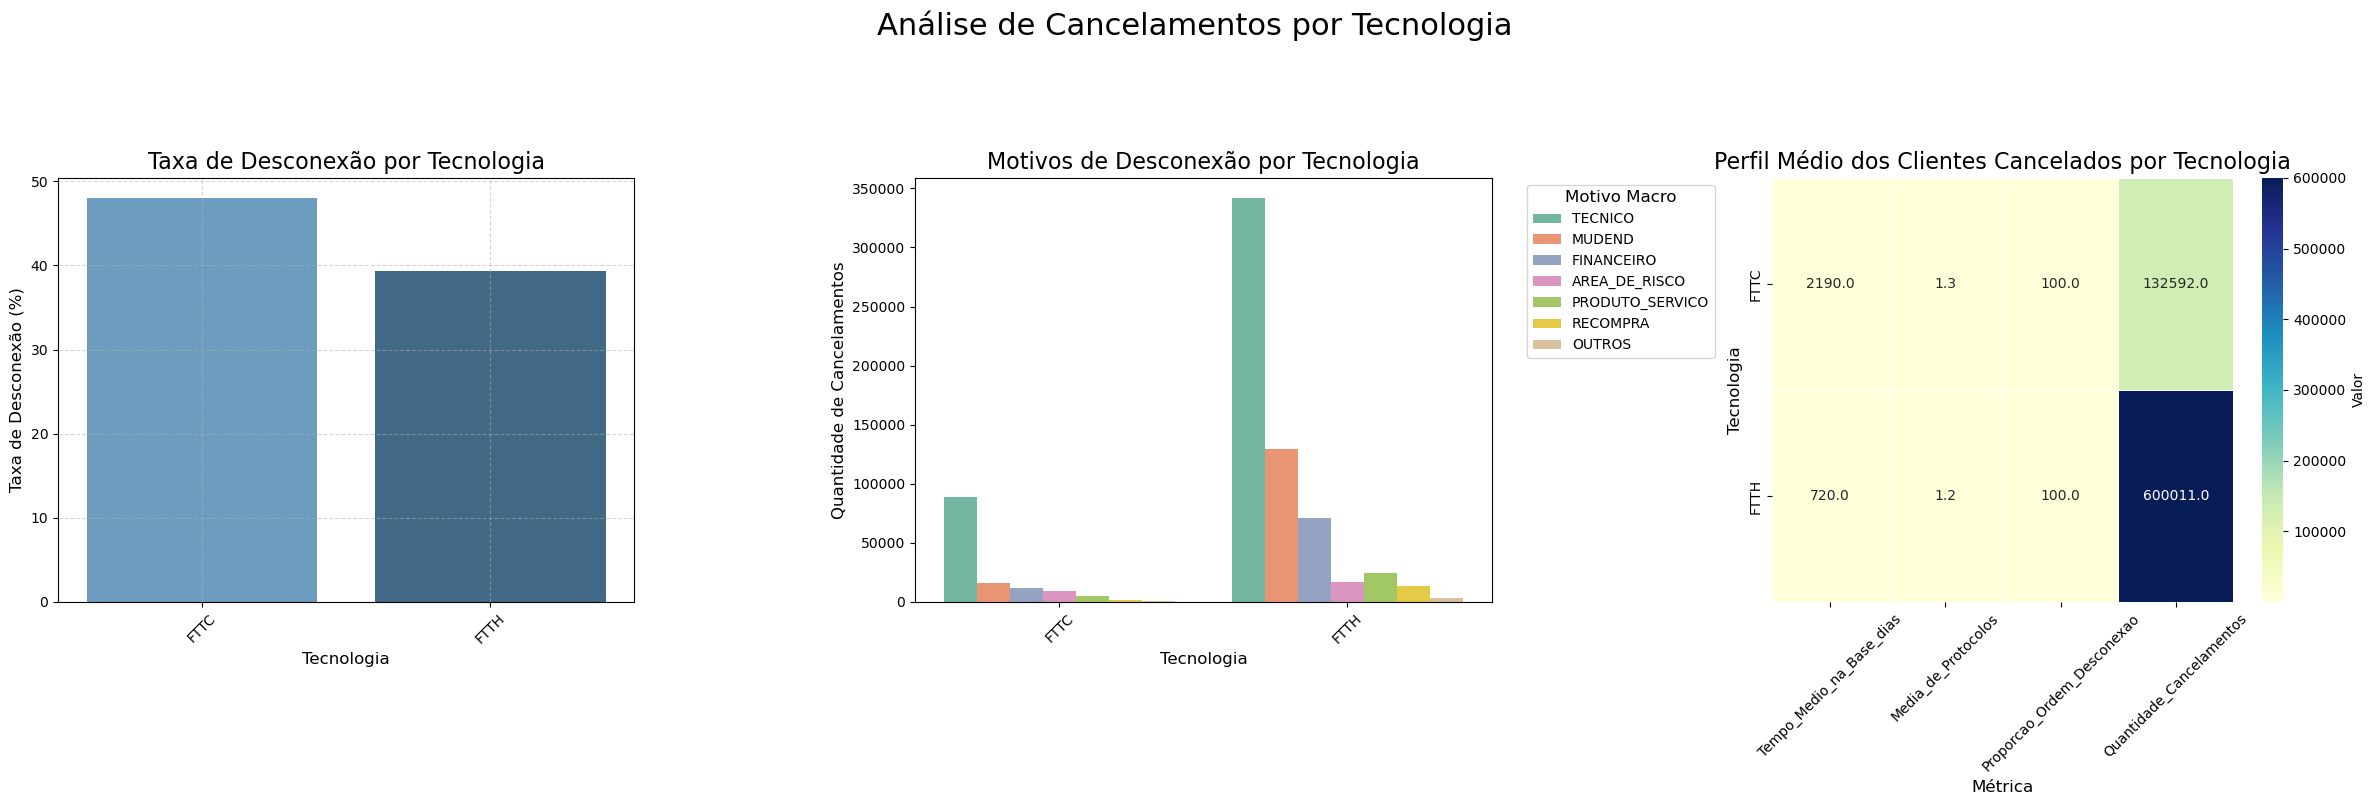

In [11]:
# 1. Taxa de Desconexão por Tecnologia
# Certifique-se de que o total de clientes por tecnologia é calculado corretamente
total_por_tecnologia = Base_Clientes_Desconexao_Detalhado['TECNOLOGIA'].value_counts()
cancelados_por_tecnologia = cancelamentos['TECNOLOGIA'].value_counts()

# Use .div para garantir a divisão por índice (tecnologia)
taxa_cancelamento_por_tecnologia = (cancelados_por_tecnologia.div(total_por_tecnologia) * 100).fillna(0)
Base_desconexao_tecnologia = taxa_cancelamento_por_tecnologia.reset_index()
Base_desconexao_tecnologia.columns = ['TECNOLOGIA', 'Taxa de Desconexao']

# 2. Motivos de Desconexão por Tecnologia (Macro)
motivos_por_tecnologia = cancelamentos.groupby(
    ['TECNOLOGIA', 'MOTIVO_CANCELAMENTO_VISAO_MACRO']
).size().reset_index(name='Quantidade')

motivos_por_tecnologia = motivos_por_tecnologia.sort_values(
    by=['TECNOLOGIA', 'Quantidade'], ascending=[True, False]
)

# 3. Perfil dos Cancelados por Tecnologia (para o Heatmap)
perfil_cancelados_por_tecnologia = cancelamentos.groupby('TECNOLOGIA').agg(
    Tempo_Medio_na_Base_dias=('DIAS_BASE_CHURN', 'mean'),
    Media_de_Protocolos=('QUANTIDADE_PROTOCOLOS', 'mean'),
    Proporcao_Ordem_Desconexao=('FLAG_ORDEM_DESCONEXAO', 'mean'),
    Quantidade_Cancelamentos=('CPF_CNPJ_CLIENTE', 'count')
).reset_index()

# Arredondar as colunas numéricas para melhor visualização no heatmap
perfil_cancelados_por_tecnologia['Tempo_Medio_na_Base_dias'] = perfil_cancelados_por_tecnologia['Tempo_Medio_na_Base_dias'].round(0)
perfil_cancelados_por_tecnologia['Media_de_Protocolos'] = perfil_cancelados_por_tecnologia['Media_de_Protocolos'].round(1)
perfil_cancelados_por_tecnologia['Proporcao_Ordem_Desconexao'] = (perfil_cancelados_por_tecnologia['Proporcao_Ordem_Desconexao'] * 100).round(1)


# --- Criação dos Subplots ---
# Definir a figura e os eixos para 1 linha e 3 colunas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8)) # Ajuste o figsize
fig.suptitle('Análise de Cancelamentos por Tecnologia', fontsize=22, y=1.05) # Título geral da figura

# --- Plotando os Gráficos em Cada Subplot ---

# Gráfico 1: Taxa de Desconexão por Tecnologia
sns.barplot(
    x='TECNOLOGIA',
    y='Taxa de Desconexao',
    data=Base_desconexao_tecnologia.sort_values(by='Taxa de Desconexao', ascending=False),
    palette='Blues_d',
    ax=axes[0]
)
axes[0].set_title('Taxa de Desconexão por Tecnologia', fontsize=16)
axes[0].set_xlabel('Tecnologia', fontsize=12)
axes[0].set_ylabel('Taxa de Desconexão (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico 2: Motivos de Desconexão por Tecnologia
# Use 'hue' para MOTIVO_CANCELAMENTO_VISAO_MACRO e 'x' para TECNOLOGIA
sns.barplot(
    data=motivos_por_tecnologia,
    x='TECNOLOGIA',
    y='Quantidade',
    hue='MOTIVO_CANCELAMENTO_VISAO_MACRO',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Motivos de Desconexão por Tecnologia', fontsize=16)
axes[1].set_xlabel('Tecnologia', fontsize=12)
axes[1].set_ylabel('Quantidade de Cancelamentos', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Motivo Macro', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)


# Gráfico 3: Heatmap do Perfil dos Cancelados por Tecnologia
# Prepare os dados para o heatmap: TECNOLOGIA como índice
df_heatmap = perfil_cancelados_por_tecnologia.set_index('TECNOLOGIA')

# Forçar conversão de todas as colunas (exceto índice) para números
# 🔸 Converter todos os tipos para float64 padrão (numpy)
df_heatmap = perfil_cancelados_por_tecnologia.set_index('TECNOLOGIA').astype('float64')

# Crie o heatmap
sns.heatmap(
    df_heatmap,
    annot=True,
    cmap='YlGnBu', # Escolha um colormap adequado
    fmt=".1f",     # Formato para os números no heatmap
    linewidths=.5,
    cbar_kws={'label': 'Valor'}, # Rótulo para a barra de cores
    ax=axes[2]
)
axes[2].set_title('Perfil Médio dos Clientes Cancelados por Tecnologia', fontsize=16)
axes[2].set_xlabel('Métrica', fontsize=12)
axes[2].set_ylabel('Tecnologia', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)


# Ajustar o layout e espaçamento entre os subplots
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajusta o layout, deixando espaço para o suptitle
plt.show()

C:\Users\F8090067\AppData\Local\Temp\ipykernel_20816\2779633363.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


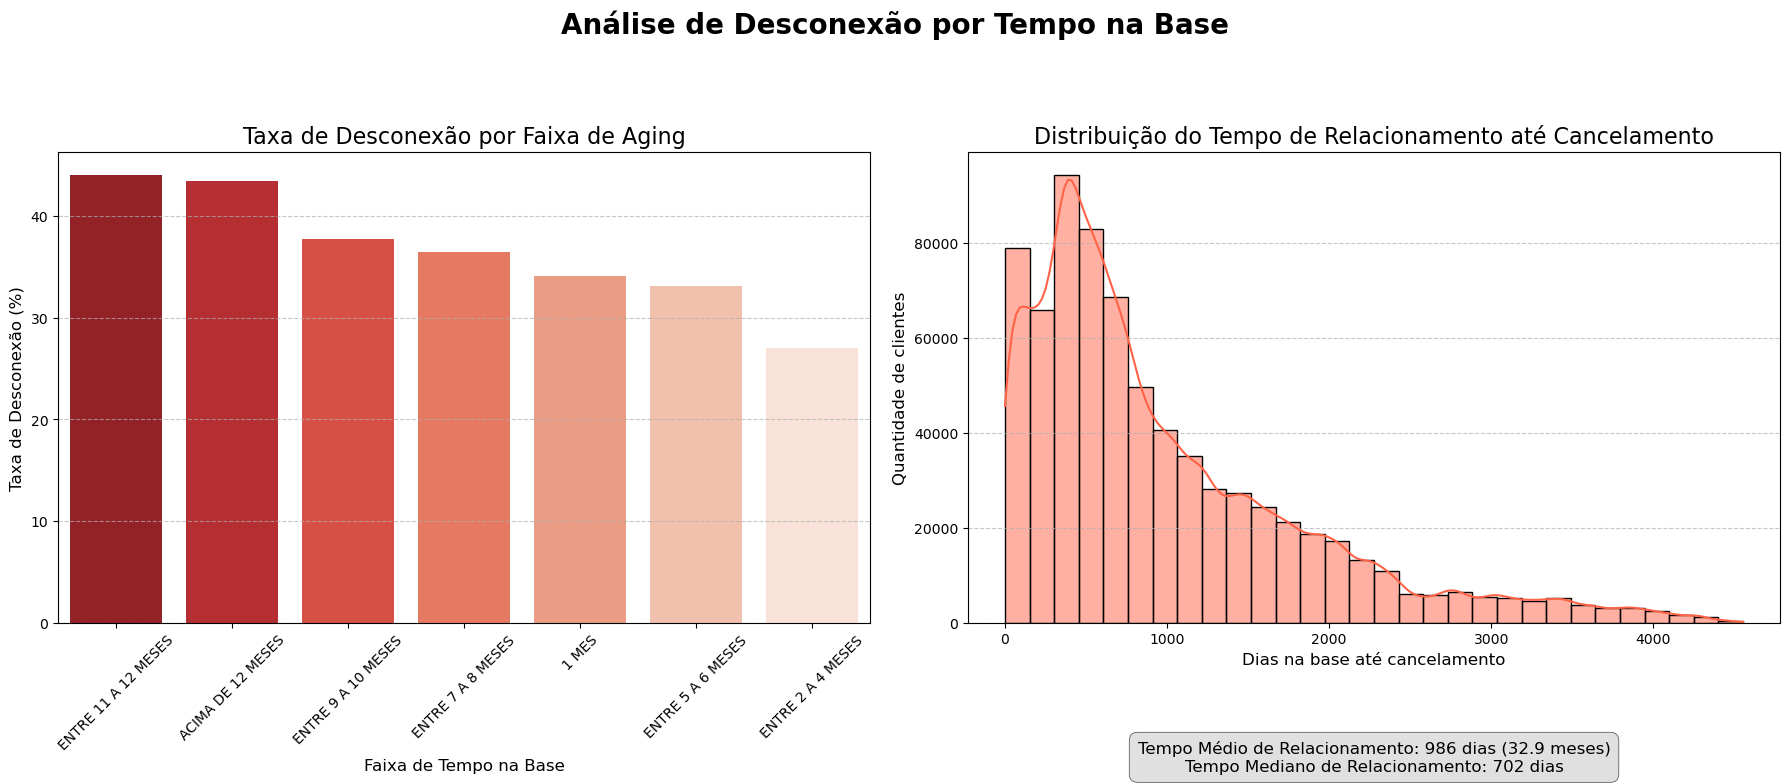

In [12]:
filtro_clientes_cancelados = Base_Clientes_Desconexao_Detalhado[Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 0]

# --- Preparação dos Dados para o Gráfico de Aging ---
# Tabela de retenção por faixa de aging
tabela_aging = pd.crosstab(Base_Clientes_Desconexao_Detalhado['MESES_AGING_BASE'], Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'])

# Calcular a taxa de desconexão por aging
# Garante que a coluna '0' (desconectados) e '1' (retidos) existam
if 0 not in tabela_aging.columns:
    tabela_aging[0] = 0
if 1 not in tabela_aging.columns:
    tabela_aging[1] = 0

taxa_desconexao_aging = tabela_aging.apply(lambda x: x[0] / (x[0] + x[1]) * 100 if (x[0] + x[1]) > 0 else 0, axis=1).reset_index()
taxa_desconexao_aging.columns = ['Aging', 'Taxa de Desconexão (%)']

# Ordenar a taxa de desconexão por aging do maior para o menor
taxa_desconexao_aging_ordenada = taxa_desconexao_aging.sort_values(
    by='Taxa de Desconexão (%)',
    ascending=False
)

# --- Preparação dos Dados para o Histograma de Tempo de Relacionamento ---
tempo_medio_dias = filtro_clientes_cancelados['DIAS_BASE_CHURN'].mean()
tempo_mediano_dias = filtro_clientes_cancelados['DIAS_BASE_CHURN'].median()
tempo_medio_meses = tempo_medio_dias / 30


# --- Criação da Nova Figura com Subplots ---
# Layout: 1 linha, 2 colunas para os dois gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) # Tamanho ajustado para os dois gráficos
fig.suptitle('Análise de Desconexão por Tempo na Base', fontsize=20, fontweight='bold', y=1.02)

# --- Plotando o Gráfico de Aging ---
sns.barplot(
    data=taxa_desconexao_aging_ordenada,
    x='Aging',
    y='Taxa de Desconexão (%)',
    palette='Reds_r',
    ax=axes[0]
)
axes[0].set_title('Taxa de Desconexão por Faixa de Aging', fontsize=16)
axes[0].set_xlabel('Faixa de Tempo na Base', fontsize=12)
axes[0].set_ylabel('Taxa de Desconexão (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Plotando o Histograma ---
sns.histplot(
    data=filtro_clientes_cancelados,
    x='DIAS_BASE_CHURN',
    bins=30,
    kde=True,
    color='tomato',
    ax=axes[1]
)
axes[1].set_title('Distribuição do Tempo de Relacionamento até Cancelamento', fontsize=16)
axes[1].set_xlabel('Dias na base até cancelamento', fontsize=12)
axes[1].set_ylabel('Quantidade de clientes', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# --- Adicionando as Métricas de Tempo como Texto (Card de Texto) ---
# Vamos usar o subplot do histograma (axes[1]) para adicionar as informações de texto abaixo do gráfico.
# Isso economiza espaço e as mantém próximas do gráfico de distribuição.
text_metrics = (
    f"Tempo Médio de Relacionamento: {tempo_medio_dias:.0f} dias ({tempo_medio_meses:.1f} meses)\n"
    f"Tempo Mediano de Relacionamento: {tempo_mediano_dias:.0f} dias"
)

# Adiciona o texto abaixo do histograma
axes[1].text(0.5, -0.25, # Ajuste o Y para mover o texto para baixo
             text_metrics,
             transform=axes[1].transAxes, # Transforma coordenadas para serem relativas ao eixo
             fontsize=12, ha='center', va='top',
             bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", ec="black", lw=0.5, alpha=0.7))


plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta o layout para evitar sobreposição, deixando espaço para o suptitle
plt.show()

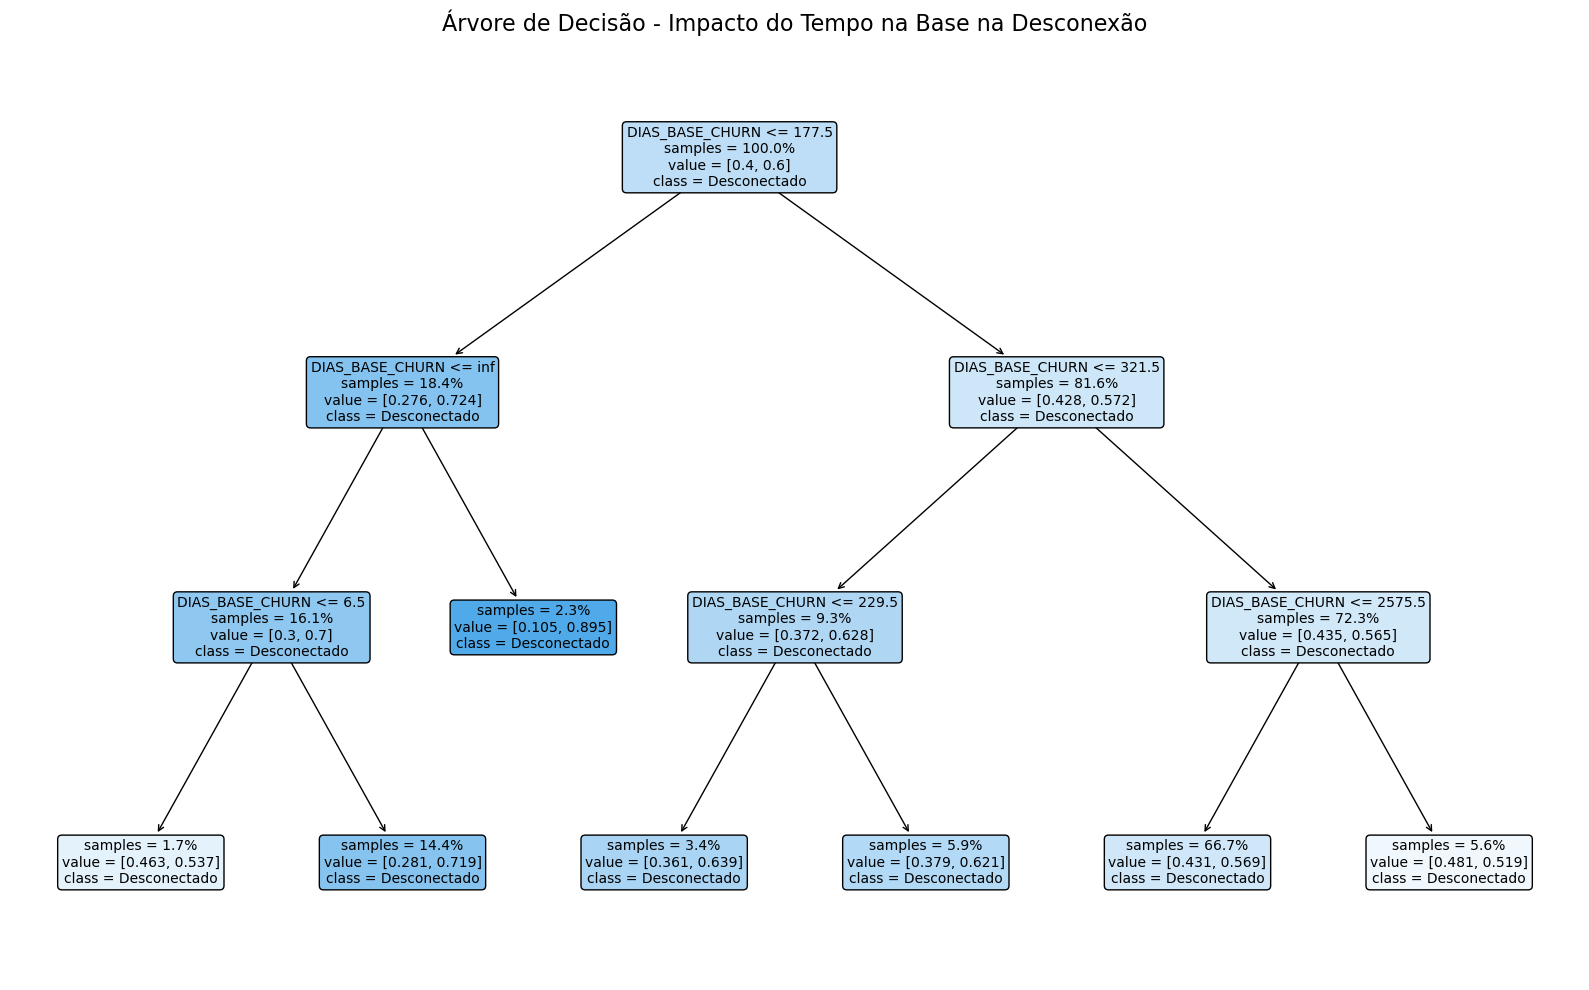

In [ ]:
X = Base_Clientes_Desconexao_Detalhado[['DIAS_BASE_CHURN']]
y = Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO']

# Criar modelo da árvore
arvore = DecisionTreeClassifier(
    max_depth=3,          # Limita a profundidade para facilitar a interpretação
    min_samples_leaf=100, # Ajuste conforme seu volume
    random_state=42
)

arvore.fit(X, y)

plt.figure(figsize=(16, 10)) # <<< Aumentado o figsize para melhor clareza
plot_tree(
    arvore,
    feature_names=['DIAS_BASE_CHURN'],
    class_names=['Retido', 'Desconectado'],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True, # <<< Adicionado: mostra proporção de amostras em vez de contagem
    impurity=False   # <<< Adicionado: oculta o valor de impureza Gini
)
plt.title('Árvore de Decisão - Impacto do Tempo na Base na Desconexão', fontsize=16) # Título um pouco maior
plt.tight_layout() # Garante que tudo se encaixe bem
plt.show()                                                        

---

### **4.2 Análise de Retenção**

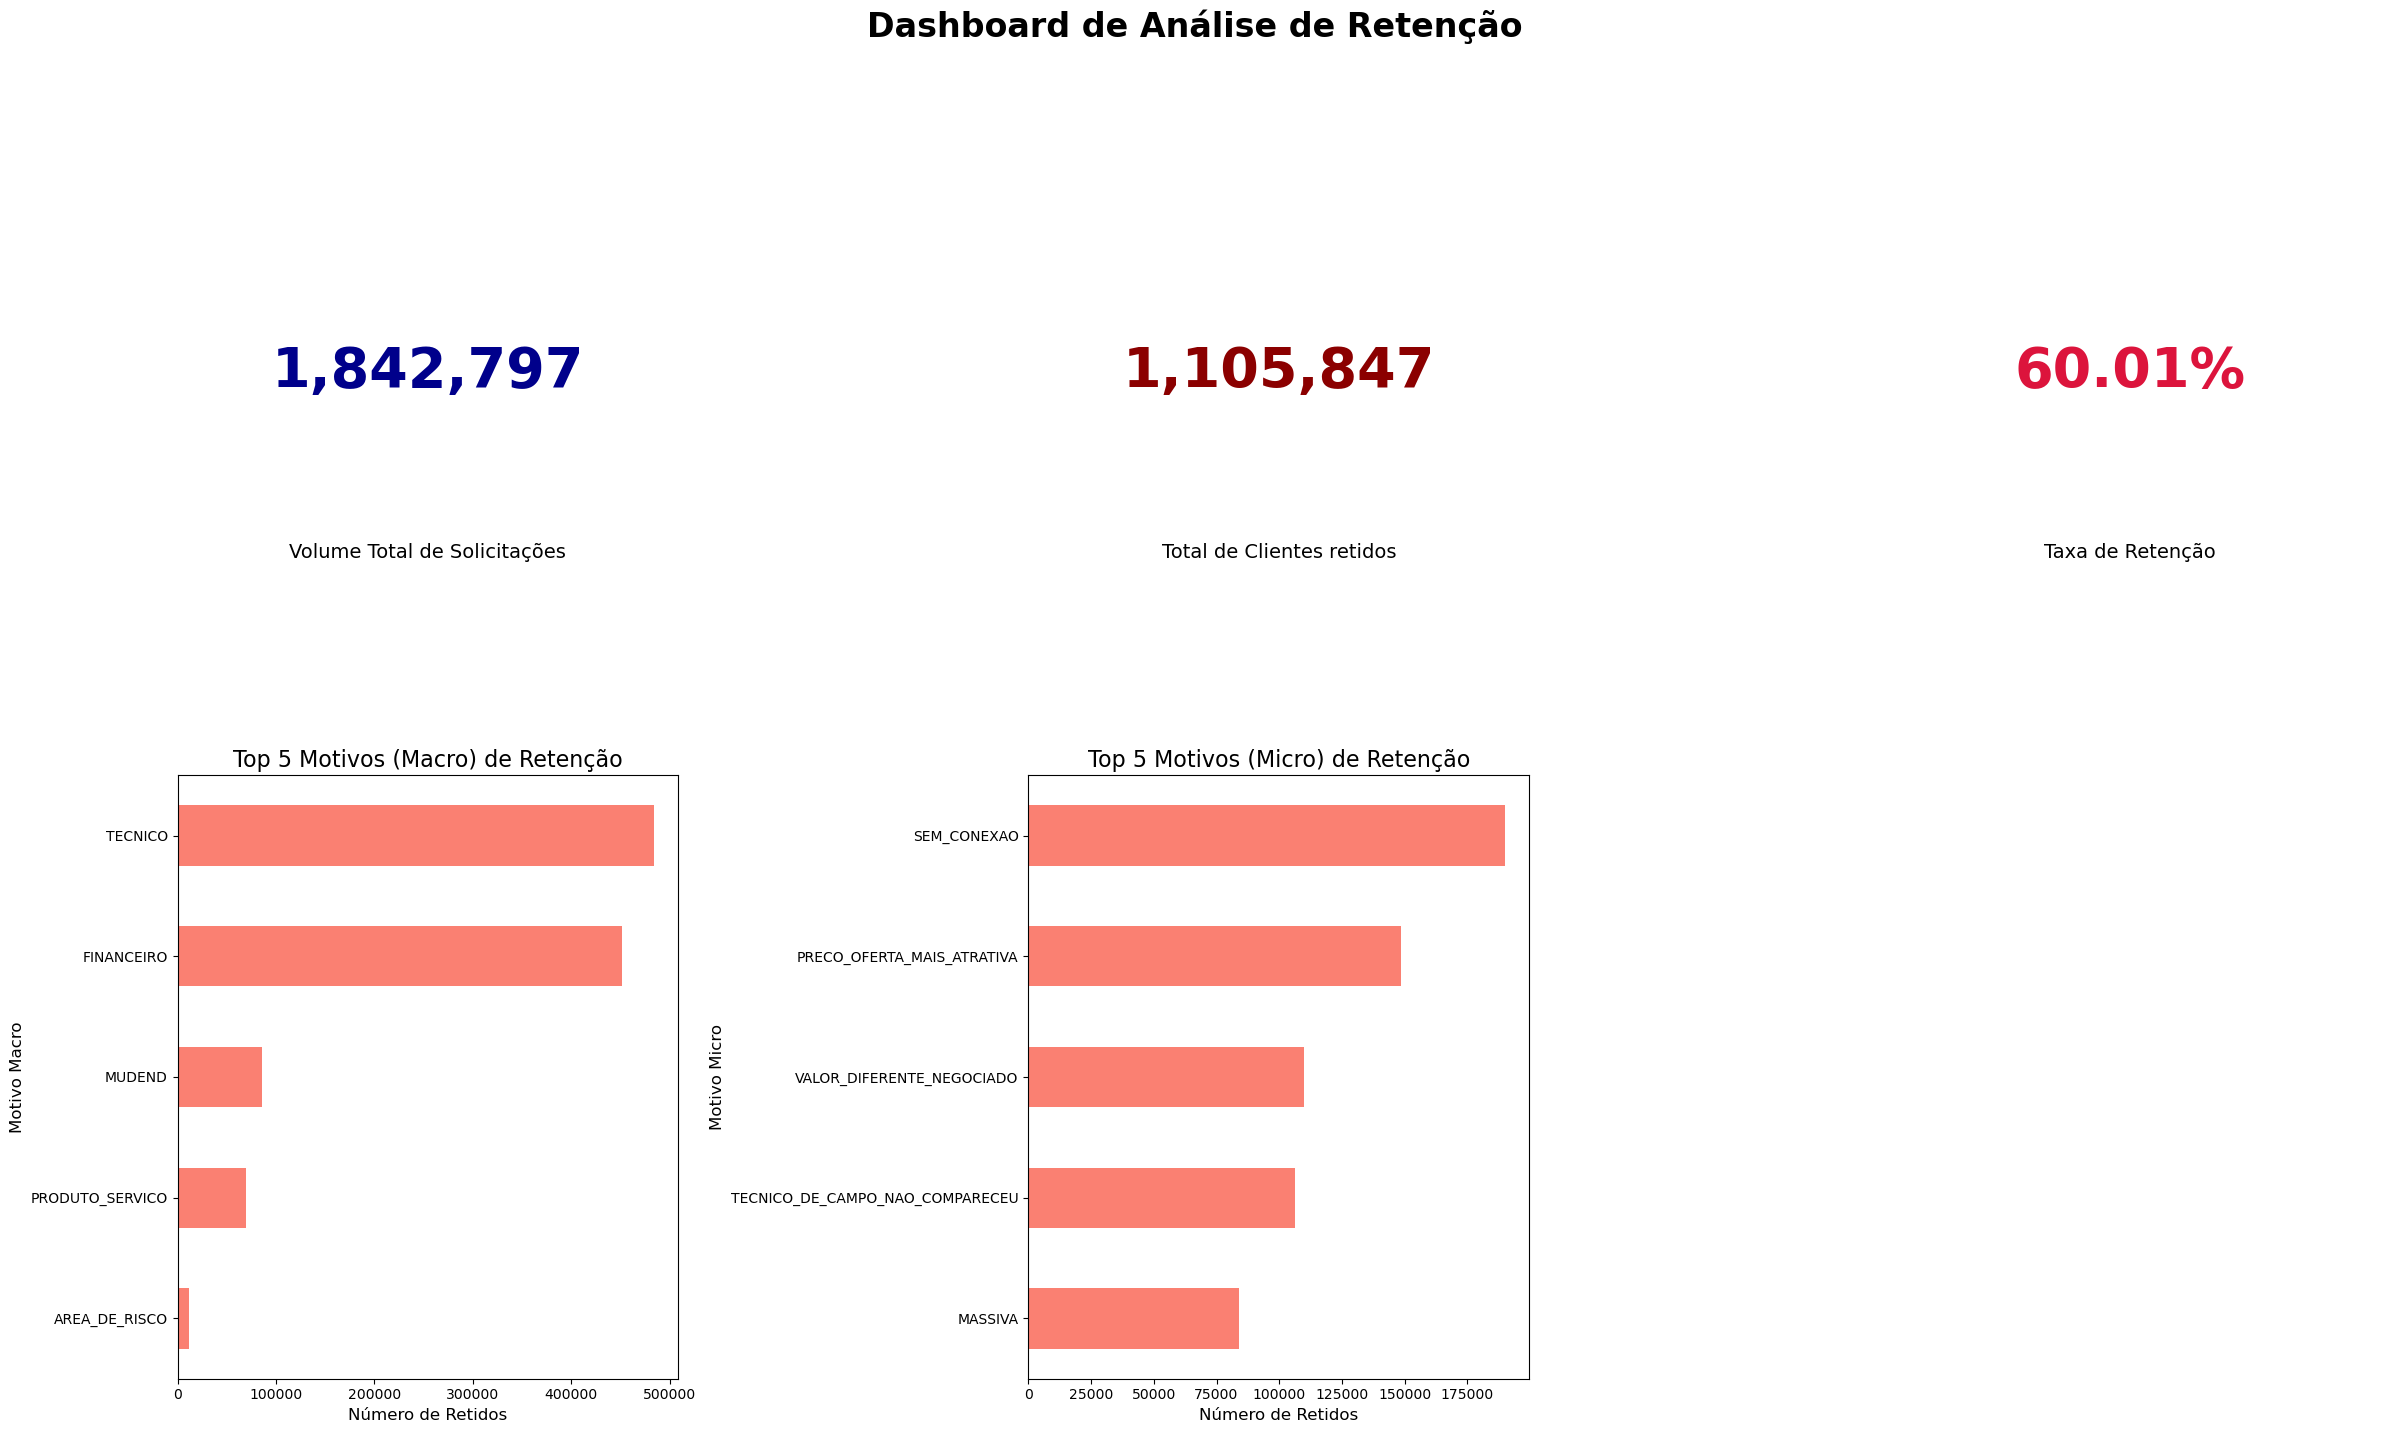

In [ ]:
total_solicitacoes = len(Base_Clientes_Desconexao_Detalhado)

retidos = Base_Clientes_Desconexao_Detalhado[Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 1]

# Filtrar apenas os clientes que realmente cancelaram

# --- Cálculo das Métricas para os Cards ---
total_solicitacoes = len(Base_Clientes_Desconexao_Detalhado)
total_retidos = retidos.shape[0]
taxa_retencao = (total_retidos / total_solicitacoes) * 100

# --- Preparação dos Dados para os Gráficos de Motivos ---
frequencias_macro_motivos = retidos['MOTIVO_CANCELAMENTO_VISAO_MACRO'].value_counts()
frequencias_micro_motivos = retidos['MOTIVO_CANCELAMENTO_VISAO_MICRO'].value_counts()

# --- Função para Criar um Card (Reutilizada) ---
def create_metric_card(ax, value, title, subtitle="", value_fontsize=32, title_fontsize=14, subtitle_fontsize=12, value_color='royalblue'):
    ax.axis('off')
    ax.text(0.5, 0.6,
            value,
            fontsize=value_fontsize, fontweight='bold', color=value_color,
            ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 0.3,
            title,
            fontsize=title_fontsize, ha='center', va='center', transform=ax.transAxes)
    if subtitle:
        ax.text(0.5, 0.1,
                subtitle,
                fontsize=subtitle_fontsize, color='gray', ha='center', va='center', transform=ax.transAxes)
        

# --- Criação da Figura e Subplots ---
# Layout: 2 linhas, 3 colunas (3 cards na primeira linha, 2 gráficos na segunda)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 14))
fig.suptitle('Dashboard de Análise de Retenção', fontsize=24, fontweight='bold', y=1.02)

# Flatten o array de eixos para facilitar a iteração
axes = axes.flatten()


# --- Plotando os Cards (Primeira Linha) ---
# Card 1: Total de Solicitações
create_metric_card(
    ax=axes[0],
    value=f'{total_solicitacoes:,}',
    title='Volume Total de Solicitações',
    value_fontsize=40,
    value_color='darkblue' # Cor individual, OK aqui
)

# Card 2: Total de Retidos
create_metric_card(
    ax=axes[1],
    value=f'{total_retidos:,}',
    title='Total de Clientes retidos',
    value_fontsize=40,
    value_color='darkred' # Cor individual, OK aqui
)

# Card 3: Taxa de Retenção
create_metric_card(
    ax=axes[2],
    value=f'{taxa_retencao:.2f}%',
    title='Taxa de Retenção',
    value_fontsize=40,
    value_color='crimson' # Cor individual, OK aqui
)


# --- Plotando os Gráficos (Segunda Linha) ---

# Gráfico 4: Top 5 Motivos (Macro) de Cancelamento
frequencias_macro_motivos.head(5).sort_values().plot(kind='barh', color='salmon', ax=axes[3])
axes[3].set_title('Top 5 Motivos (Macro) de Retenção', fontsize=16)
axes[3].set_xlabel('Número de Retidos', fontsize=12)
axes[3].set_ylabel('Motivo Macro', fontsize=12)
axes[3].tick_params(axis='x', rotation=0) 
axes[3].tick_params(axis='y', labelsize=10) 

# Gráfico 5: Top 5 Motivos (Micro) de Cancelamento
frequencias_micro_motivos.head(5).sort_values().plot(kind='barh', color='salmon', ax=axes[4])
axes[4].set_title('Top 5 Motivos (Micro) de Retenção', fontsize=16)
axes[4].set_xlabel('Número de Retidos', fontsize=12)
axes[4].set_ylabel('Motivo Micro', fontsize=12)
axes[4].tick_params(axis='x', rotation=0)
axes[4].tick_params(axis='y', labelsize=10)


axes[5].axis('off')


plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

C:\Users\F8090067\AppData\Local\Temp\ipykernel_15776\1226896156.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_retidos_por_uf.index,
C:\Users\F8090067\AppData\Local\Temp\ipykernel_15776\1226896156.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


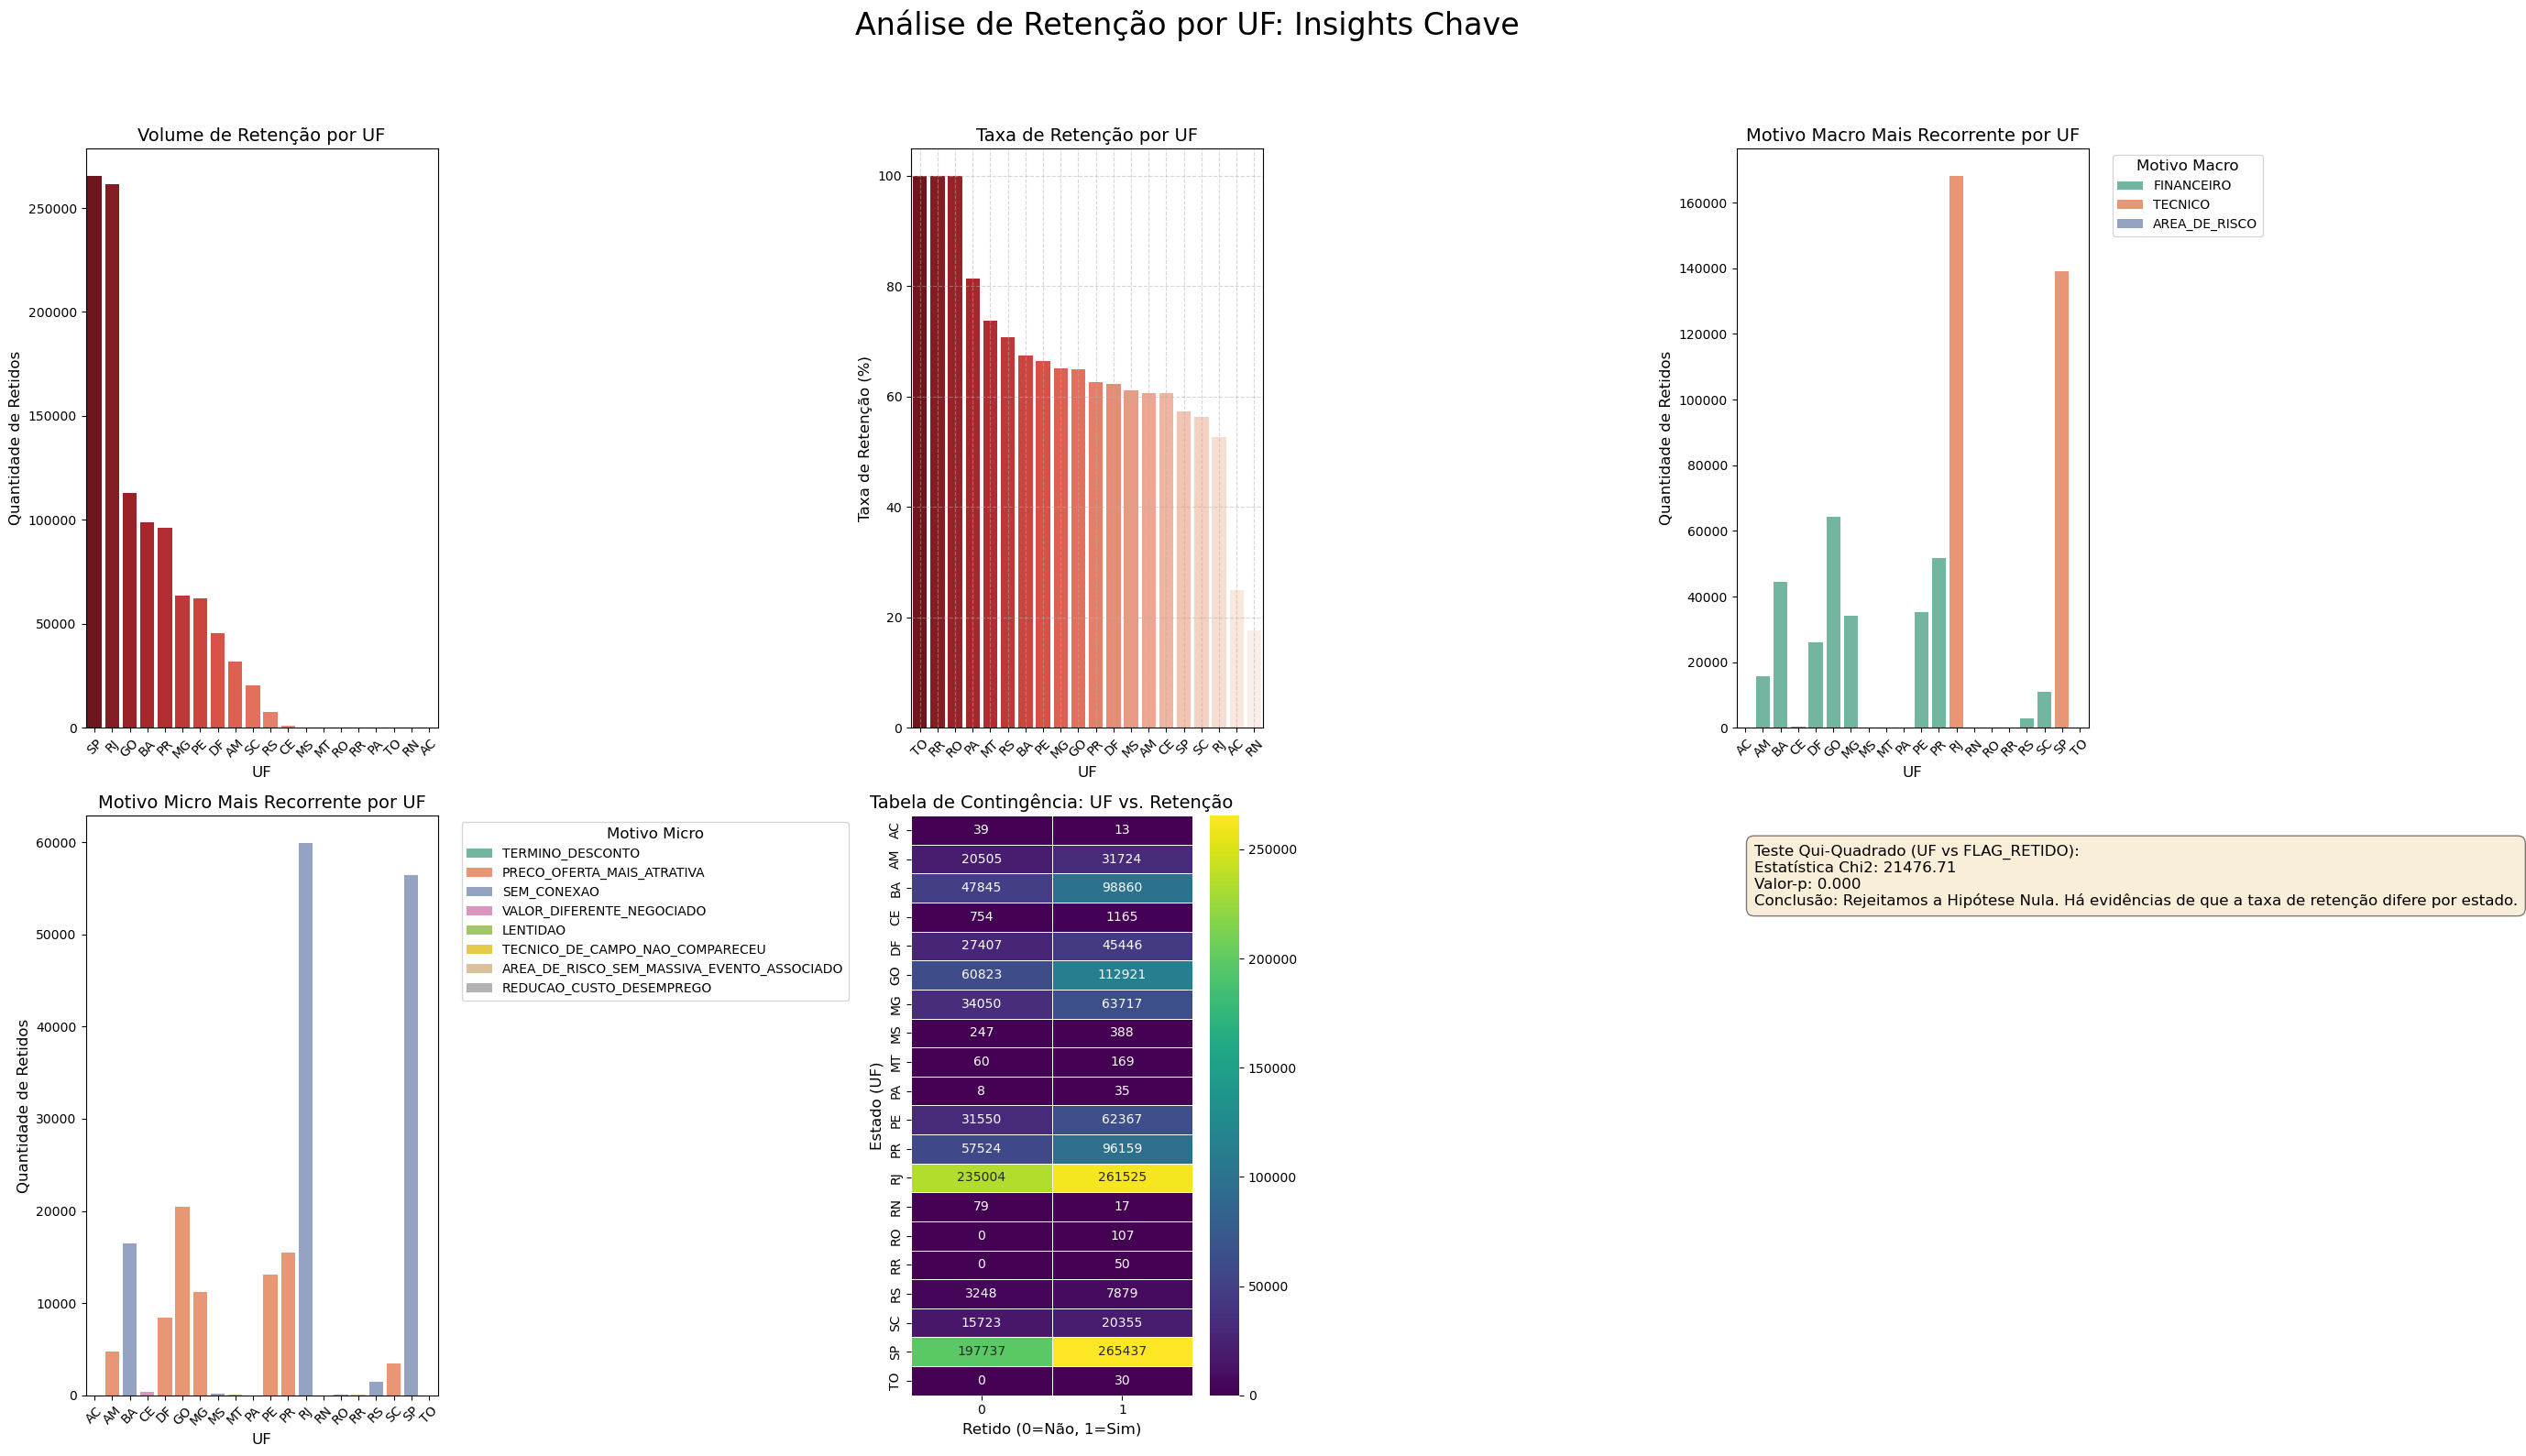

In [ ]:
from scipy.stats import chi2_contingency

retidos = Base_Clientes_Desconexao_Detalhado[Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 1]

# --- Preparação dos Dados para os Gráficos ---

# 1. Volume de Cancelamentos por UF
contagem_retidos_por_uf = retidos['UF'].value_counts()

# 2. Taxa de Desconexão por UF
total_por_retidos_uf = Base_Clientes_Desconexao_Detalhado.groupby('UF').size().reset_index(name='Total_Solicitacoes')
retidos_por_uf = Base_Clientes_Desconexao_Detalhado[
    Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 1
].groupby('UF').size().reset_index(name='Retidos')
taxa_retencao_uf = pd.merge(total_por_retidos_uf, retidos_por_uf, on='UF', how='left')
taxa_retencao_uf['Retidos'] = taxa_retencao_uf['Retidos'].fillna(0)
taxa_retencao_uf['Taxa de Retenção (%)'] = (
    taxa_retencao_uf['Retidos'] / taxa_retencao_uf['Total_Solicitacoes'] * 100
).round(2)

# 3. Motivo Macro de Retenção Mais Recorrente por UF
Motivos_Macros_Retencao = retidos.groupby(['UF', 'MOTIVO_CANCELAMENTO_VISAO_MACRO']).size().reset_index(name='Quantidade')
Motivo_Macro_Principal_Retencao = Motivos_Macros_Retencao.loc[
    Motivos_Macros_Retencao.groupby('UF')['Quantidade'].idxmax()
].reset_index(drop=True)

# 4. Motivo Micro de Retenção Mais Recorrente por UF
Motivos_Micros_Retencao = retidos.groupby(['UF', 'MOTIVO_CANCELAMENTO_VISAO_MICRO']).size().reset_index(name='Quantidade')
Motivo_Micro_Principal_Retencao = Motivos_Micros_Retencao.loc[
    Motivos_Micros_Retencao.groupby('UF')['Quantidade'].idxmax()
].reset_index(drop=True)

# 5. Tabela de Contingência (Heatmap)
tabela_contigencia = pd.crosstab(Base_Clientes_Desconexao_Detalhado['UF'], Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'])

# --- Criação dos Subplots ---
# Definir a figura e os eixos para 2 linhas e 3 colunas
# Aumentar o figsize para dar mais espaço. Ajuste conforme sua tela e preferência.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26, 16))
fig.suptitle('Análise de Retenção por UF: Insights Chave', fontsize=24, y=1.02) # Título geral da figura

# Flatten o array de eixos para facilitar a iteração se tiver mais de uma linha/coluna
axes = axes.flatten()

# --- Plotando os Gráficos em Cada Subplot ---

# Gráfico 1: Volume de Cancelamentos por UF
sns.barplot(x=contagem_retidos_por_uf.index,
            y=contagem_retidos_por_uf.values,
            palette='Reds_r', ax=axes[0])
axes[0].set_title('Volume de Retenção por UF', fontsize=14)
axes[0].set_xlabel('UF', fontsize=12)
axes[0].set_ylabel('Quantidade de Retidos', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Taxa de Desconexão por UF
sns.barplot(
    x='UF',
    y='Taxa de Retenção (%)',
    data=taxa_retencao_uf.sort_values(by='Taxa de Retenção (%)', ascending=False),
    palette='Reds_r', ax=axes[1]
)
axes[1].set_title('Taxa de Retenção por UF', fontsize=14)
axes[1].set_xlabel('UF', fontsize=12)
axes[1].set_ylabel('Taxa de Retenção (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Gráfico 3: Motivo Macro de Cancelamento Mais Recorrente por UF
sns.barplot(
    data=Motivo_Macro_Principal_Retencao,
    x='UF',
    y='Quantidade',
    hue='MOTIVO_CANCELAMENTO_VISAO_MACRO',
    dodge=False,
    palette='Set2', ax=axes[2]
)
axes[2].set_title('Motivo Macro Mais Recorrente por UF', fontsize=14)
axes[2].set_xlabel('UF', fontsize=12)
axes[2].set_ylabel('Quantidade de Retidos', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Motivo Macro', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Gráfico 4: Motivo Micro de Cancelamento Mais Recorrente por UF
sns.barplot(
    data=Motivo_Micro_Principal_Retencao,
    x='UF',
    y='Quantidade',
    hue='MOTIVO_CANCELAMENTO_VISAO_MICRO',
    dodge=False,
    palette='Set2', ax=axes[3]
)
axes[3].set_title('Motivo Micro Mais Recorrente por UF', fontsize=14)
axes[3].set_xlabel('UF', fontsize=12)
axes[3].set_ylabel('Quantidade de Retidos', fontsize=12)
axes[3].tick_params(axis='x', rotation=45)
axes[3].legend(title='Motivo Micro', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Gráfico 5: Tabela de Contingência (Heatmap)
sns.heatmap(tabela_contigencia, annot=True, cmap='viridis', fmt='d', linewidths=.5, ax=axes[4])
axes[4].set_title('Tabela de Contingência: UF vs. Retenção', fontsize=14)
axes[4].set_xlabel('Retido (0=Não, 1=Sim)', fontsize=12)
axes[4].set_ylabel('Estado (UF)', fontsize=12)
axes[4].tick_params(axis='x', rotation=0) # Rotação 0 para os labels de 0 e 1


# --- Adicionar o resultado do Teste Qui-Quadrado como texto na figura ---
chi2, p_valor, dof, expected = chi2_contingency(tabela_contigencia)

if p_valor < 0.05:
    conclusion = "Rejeitamos a Hipótese Nula. Há evidências de que a taxa de retenção difere por estado."
else:
    conclusion = "Não rejeitamos a Hipótese Nula. Não há evidências de que a taxa de churn difere significativamente por estado."

# Formata o texto para exibição
chi2_text = (
    f"Teste Qui-Quadrado (UF vs FLAG_RETIDO):\n"
    f"Estatística Chi2: {chi2:.2f}\n"
    f"Valor-p: {p_valor:.3f}\n"
    f"Conclusão: {conclusion}"
)

# Coloca o texto no último subplot vazio (ou em um local estratégico)
# Se houver um subplot vazio, usaremos ele. Se não, podemos colocá-lo em um espaço livre.
# Neste caso, o último subplot é o axes[5]
if len(axes) > 5:
    axes[5].text(0.05, 0.95, chi2_text, transform=axes[5].transAxes, fontsize=12,
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
    axes[5].set_xticks([]) # Remove os ticks do eixo X
    axes[5].set_yticks([]) # Remove os ticks do eixo Y
    axes[5].set_frame_on(False) # Remove o contorno do subplot
else: # Caso não haja subplot vazio, podemos adicionar o texto na figura em um lugar fixo
    fig.text(0.75, 0.05, chi2_text, fontsize=12,
             verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Ajustar o layout e espaçamento entre os subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4) # Aumenta o espaçamento horizontal e vertical
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout para evitar sobreposição, deixando espaço para o suptitle
plt.show()


C:\Users\F8090067\AppData\Local\Temp\ipykernel_15776\979729661.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


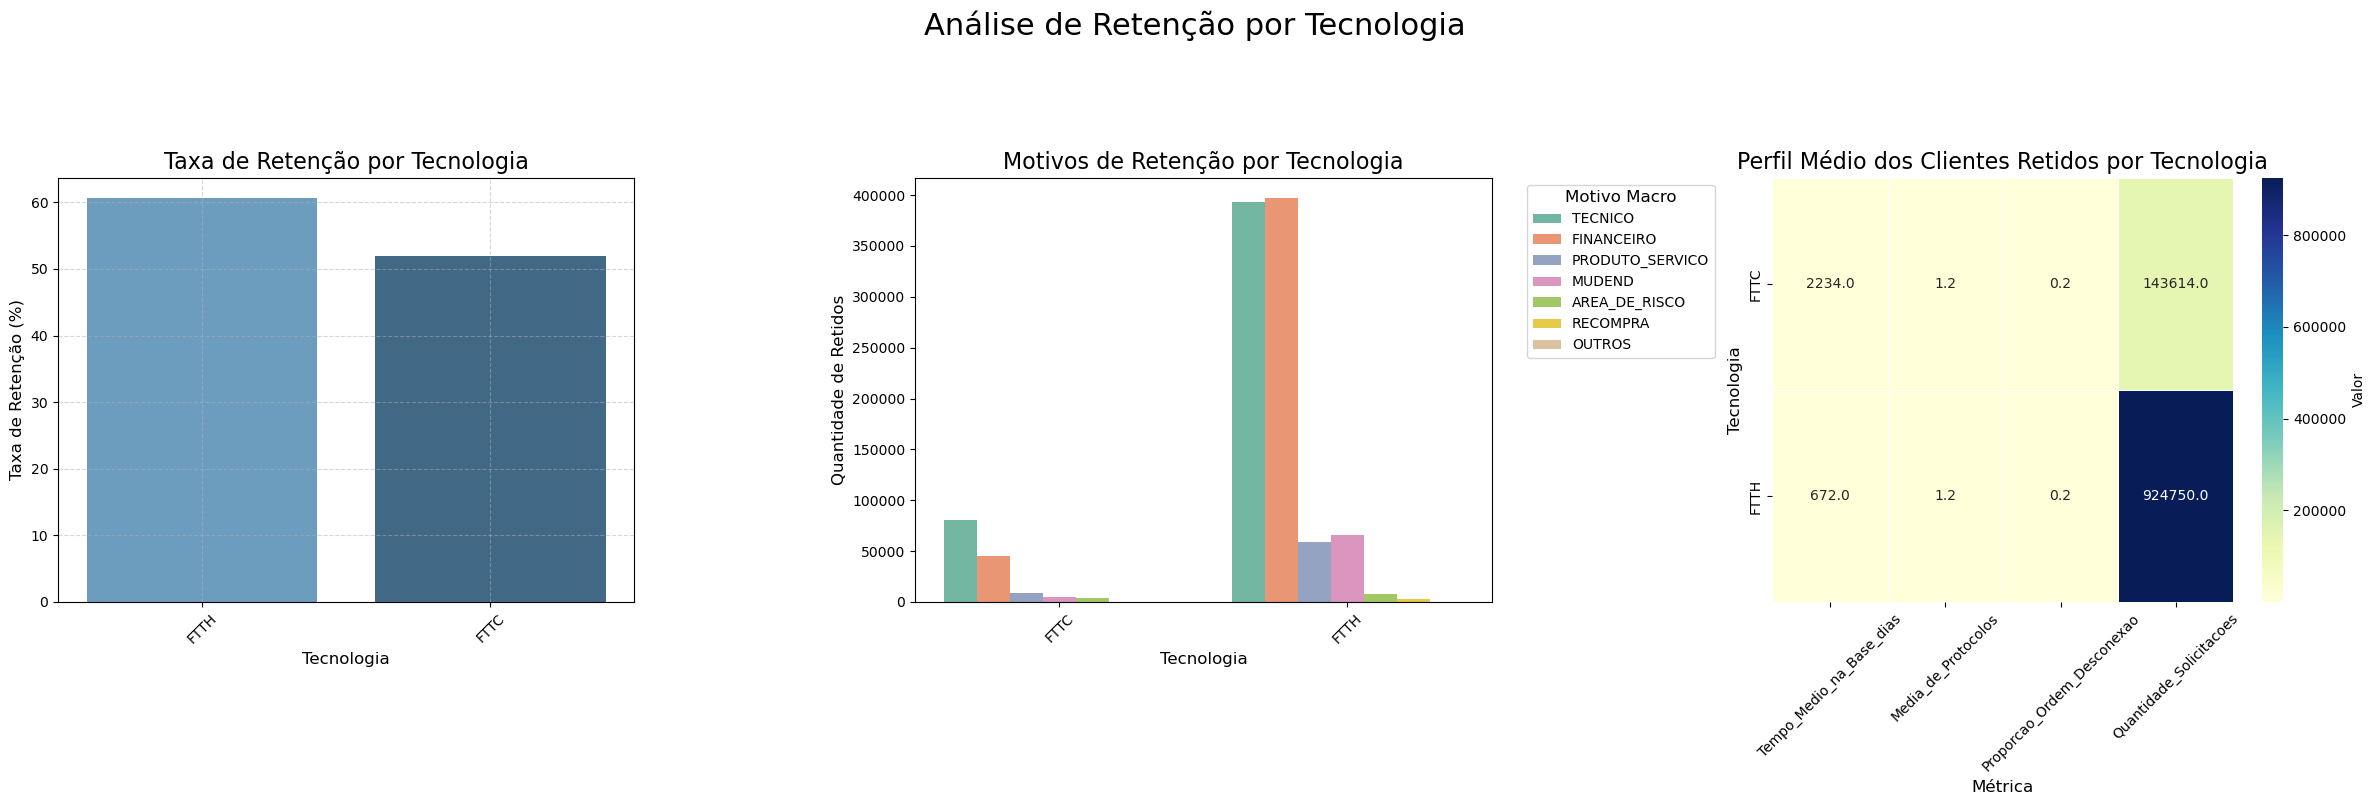

In [ ]:
retidos = Base_Clientes_Desconexao_Detalhado[Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 1]

# 1. Taxa de Retenção por Tecnologia
# Certifique-se de que o total de clientes por tecnologia é calculado corretamente
total_por_tecnologia = Base_Clientes_Desconexao_Detalhado['TECNOLOGIA'].value_counts()
retidos_por_tecnologia = retidos['TECNOLOGIA'].value_counts()

# Use .div para garantir a divisão por índice (tecnologia)
taxa_retencao_por_tecnologia = (retidos_por_tecnologia.div(total_por_tecnologia) * 100).fillna(0)
Base_retencao_tecnologia = taxa_retencao_por_tecnologia.reset_index()
Base_retencao_tecnologia.columns = ['TECNOLOGIA', 'Taxa de Retencao']

# 2. Motivos de Desconexão por Tecnologia (Macro)
motivos_retencao_por_tecnologia = retidos.groupby(
    ['TECNOLOGIA', 'MOTIVO_CANCELAMENTO_VISAO_MACRO']
).size().reset_index(name='Quantidade')

motivos_retencao_por_tecnologia = motivos_retencao_por_tecnologia.sort_values(
    by=['TECNOLOGIA', 'Quantidade'], ascending=[True, False]
)

# 3. Perfil dos Cancelados por Tecnologia (para o Heatmap)
perfil_retidos_por_tecnologia = retidos.groupby('TECNOLOGIA').agg(
    Tempo_Medio_na_Base_dias=('DIAS_BASE_CHURN', 'mean'),
    Media_de_Protocolos=('QUANTIDADE_PROTOCOLOS', 'mean'),
    Proporcao_Ordem_Desconexao=('FLAG_ORDEM_DESCONEXAO', 'mean'),
    Quantidade_Solicitacoes=('CPF_CNPJ_CLIENTE', 'count')
).reset_index()

# Arredondar as colunas numéricas para melhor visualização no heatmap
perfil_retidos_por_tecnologia['Tempo_Medio_na_Base_dias'] = perfil_retidos_por_tecnologia['Tempo_Medio_na_Base_dias'].round(0)
perfil_retidos_por_tecnologia['Media_de_Protocolos'] = perfil_retidos_por_tecnologia['Media_de_Protocolos'].round(1)
perfil_retidos_por_tecnologia['Proporcao_Ordem_Desconexao'] = (perfil_retidos_por_tecnologia['Proporcao_Ordem_Desconexao'] * 100).round(1)

# --- Criação dos Subplots ---
# Definir a figura e os eixos para 1 linha e 3 colunas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8)) # Ajuste o figsize
fig.suptitle('Análise de Retenção por Tecnologia', fontsize=22, y=1.05) # Título geral da figura

# --- Plotando os Gráficos em Cada Subplot ---

# Gráfico 1: Taxa de Desconexão por Tecnologia
sns.barplot(
    x='TECNOLOGIA',
    y='Taxa de Retencao',
    data=Base_retencao_tecnologia.sort_values(by='Taxa de Retencao', ascending=False),
    palette='Blues_d',
    ax=axes[0]
)
axes[0].set_title('Taxa de Retenção por Tecnologia', fontsize=16)
axes[0].set_xlabel('Tecnologia', fontsize=12)
axes[0].set_ylabel('Taxa de Retenção (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico 2: Motivos de Desconexão por Tecnologia
# Use 'hue' para MOTIVO_CANCELAMENTO_VISAO_MACRO e 'x' para TECNOLOGIA
sns.barplot(
    data=motivos_retencao_por_tecnologia,
    x='TECNOLOGIA',
    y='Quantidade',
    hue='MOTIVO_CANCELAMENTO_VISAO_MACRO',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Motivos de Retenção por Tecnologia', fontsize=16)
axes[1].set_xlabel('Tecnologia', fontsize=12)
axes[1].set_ylabel('Quantidade de Retidos', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Motivo Macro', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)


# Gráfico 3: Heatmap do Perfil dos Cancelados por Tecnologia
# Prepare os dados para o heatmap: TECNOLOGIA como índice
df_heatmap = perfil_retidos_por_tecnologia.set_index('TECNOLOGIA')

# Crie o heatmap
sns.heatmap(
    df_heatmap,
    annot=True,
    cmap='YlGnBu', # Escolha um colormap adequado
    fmt=".1f",     # Formato para os números no heatmap
    linewidths=.5,
    cbar_kws={'label': 'Valor'}, # Rótulo para a barra de cores
    ax=axes[2]
)
axes[2].set_title('Perfil Médio dos Clientes Retidos por Tecnologia', fontsize=16)
axes[2].set_xlabel('Métrica', fontsize=12)
axes[2].set_ylabel('Tecnologia', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)


# Ajustar o layout e espaçamento entre os subplots
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Ajusta o layout, deixando espaço para o suptitle
plt.show()

C:\Users\F8090067\AppData\Local\Temp\ipykernel_5820\1318017547.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\F8090067\AppData\Local\Temp\ipykernel_5820\1318017547.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Tabela_Aging_Retencao['MESES_AGING_BASE'], rotation=45)


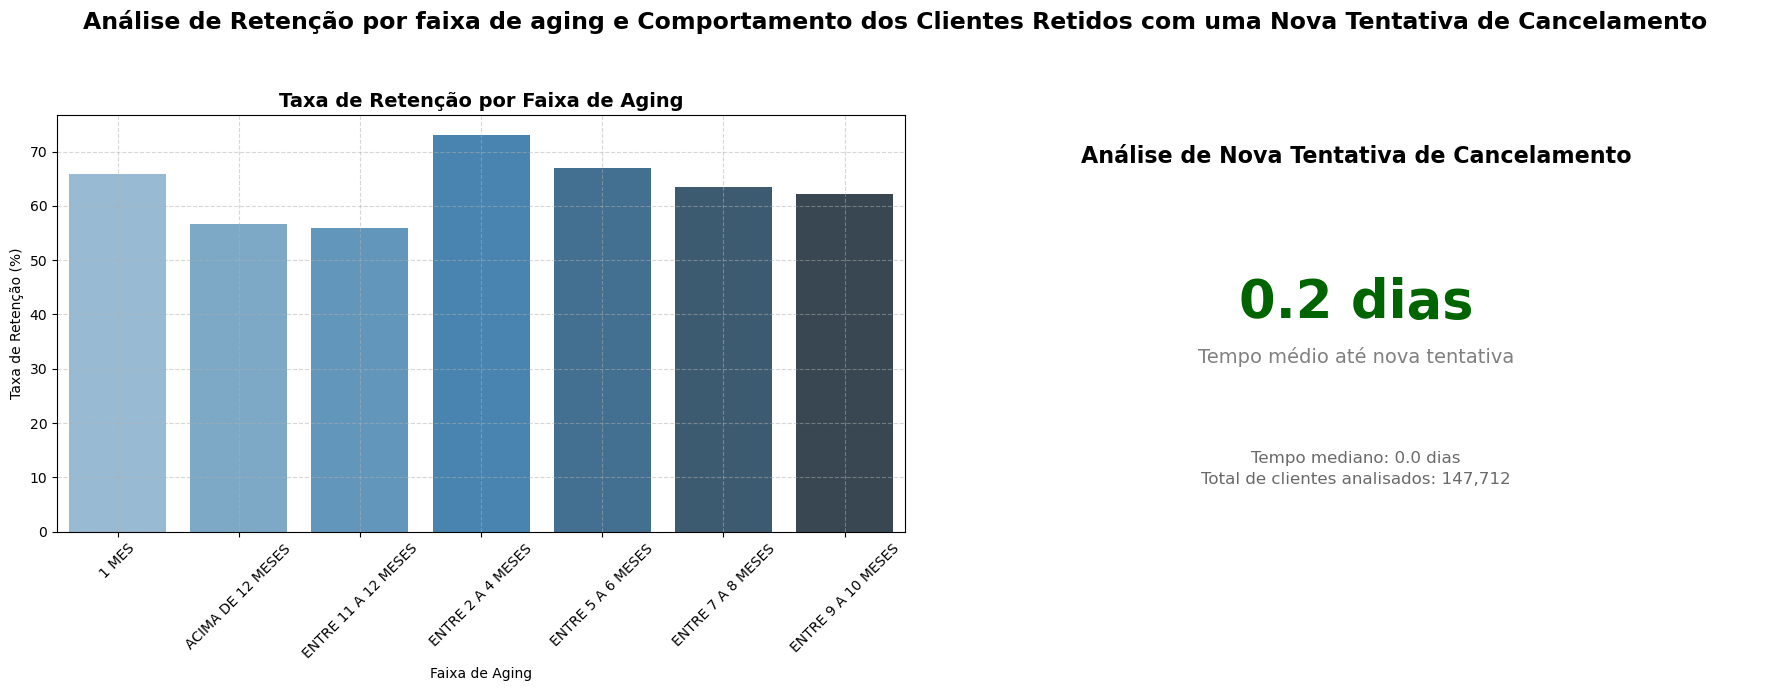

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# Gráfico 1 - Taxa de Retenção por Aging
# =====================================

Tabela_Aging_Retencao = pd.crosstab(
    Base_Clientes_Desconexao_Detalhado['MESES_AGING_BASE'],
    Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO']
)

Tabela_Aging_Retencao['Taxa de Retencao (%)'] = (
    Tabela_Aging_Retencao[1] / (Tabela_Aging_Retencao[0] + Tabela_Aging_Retencao[1]) * 100
).round(2)

Tabela_Aging_Retencao = Tabela_Aging_Retencao.reset_index().rename(
    columns={0: 'Desconectado', 1: 'Retido'}
)

# =====================================
# Gráfico 2 - Card de Métricas
# =====================================

base_faixa = Base_Clientes_Desconexao_Detalhado[
    (Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'] == 1) &
    (Base_Clientes_Desconexao_Detalhado['QUANTIDADE_PROTOCOLOS'] >= 2)
].copy()

base_faixa.sort_values(by=['CPF_CNPJ_CLIENTE', 'DATA_CRIACAO'], inplace=True)

base_faixa['DATA_PROXIMA_SOLICITACAO'] = base_faixa.groupby('CPF_CNPJ_CLIENTE')['DATA_CRIACAO'].shift(-1)

# Calcular tempo até nova solicitação (em dias)
base_faixa['DIAS_ATE_NOVA_SOLICITACAO'] = (
    base_faixa['DATA_PROXIMA_SOLICITACAO'] - base_faixa['DATA_CRIACAO']
).dt.days

clientes_validos = base_faixa.dropna(subset=['DIAS_ATE_NOVA_SOLICITACAO'])

media = clientes_validos['DIAS_ATE_NOVA_SOLICITACAO'].mean()
mediana = clientes_validos['DIAS_ATE_NOVA_SOLICITACAO'].median()
qtd = clientes_validos.shape[0]

# =====================================
# Criação da Figura com Subplots
# =====================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# ---------------------------
# Subplot 1 - Taxa de Retenção
# ---------------------------
sns.barplot(
    data=Tabela_Aging_Retencao,
    x='MESES_AGING_BASE',
    y='Taxa de Retencao (%)',
    palette='Blues_d',
    ax=ax1
)

ax1.set_title('Taxa de Retenção por Faixa de Aging', fontsize=14, fontweight='bold')
ax1.set_xlabel('Faixa de Aging')
ax1.set_ylabel('Taxa de Retenção (%)')
ax1.set_xticklabels(Tabela_Aging_Retencao['MESES_AGING_BASE'], rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)

# ---------------------------
# Subplot 2 - Card de Métricas
# ---------------------------
ax2.axis('off')

# Título do card
ax2.text(0.5, 0.9, "Análise de Nova Tentativa de Cancelamento",
         fontsize=16, fontweight='bold', ha='center', va='center', transform=ax2.transAxes)

# Métrica principal
ax2.text(0.5, 0.55, f"{media:.1f} dias",
         fontsize=38, fontweight='bold', color='darkgreen',
         ha='center', va='center', transform=ax2.transAxes)

ax2.text(0.5, 0.42, "Tempo médio até nova tentativa",
         fontsize=14, color='gray', ha='center', va='center', transform=ax2.transAxes)

# Outras métricas
ax2.text(0.5, 0.15,
         f"Tempo mediano: {mediana:.1f} dias\n"
         f"Total de clientes analisados: {qtd:,}",
         fontsize=12, color='dimgray', ha='center', va='center',
         transform=ax2.transAxes, linespacing=1.5)

# Fundo do card
ax2.set_facecolor('lightgoldenrodyellow')
plt.gca().set_facecolor('whitesmoke')

# ---------------------------
# Título Geral
# ---------------------------
plt.suptitle('Análise de Retenção por faixa de aging e Comportamento dos Clientes Retidos com uma Nova Tentativa de Cancelamento', fontsize=17, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.94])

plt.show()


### **Analise Operacional**

C:\Users\F8090067\AppData\Local\Temp\ipykernel_20868\2210813874.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\F8090067\AppData\Local\Temp\ipykernel_20868\2210813874.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


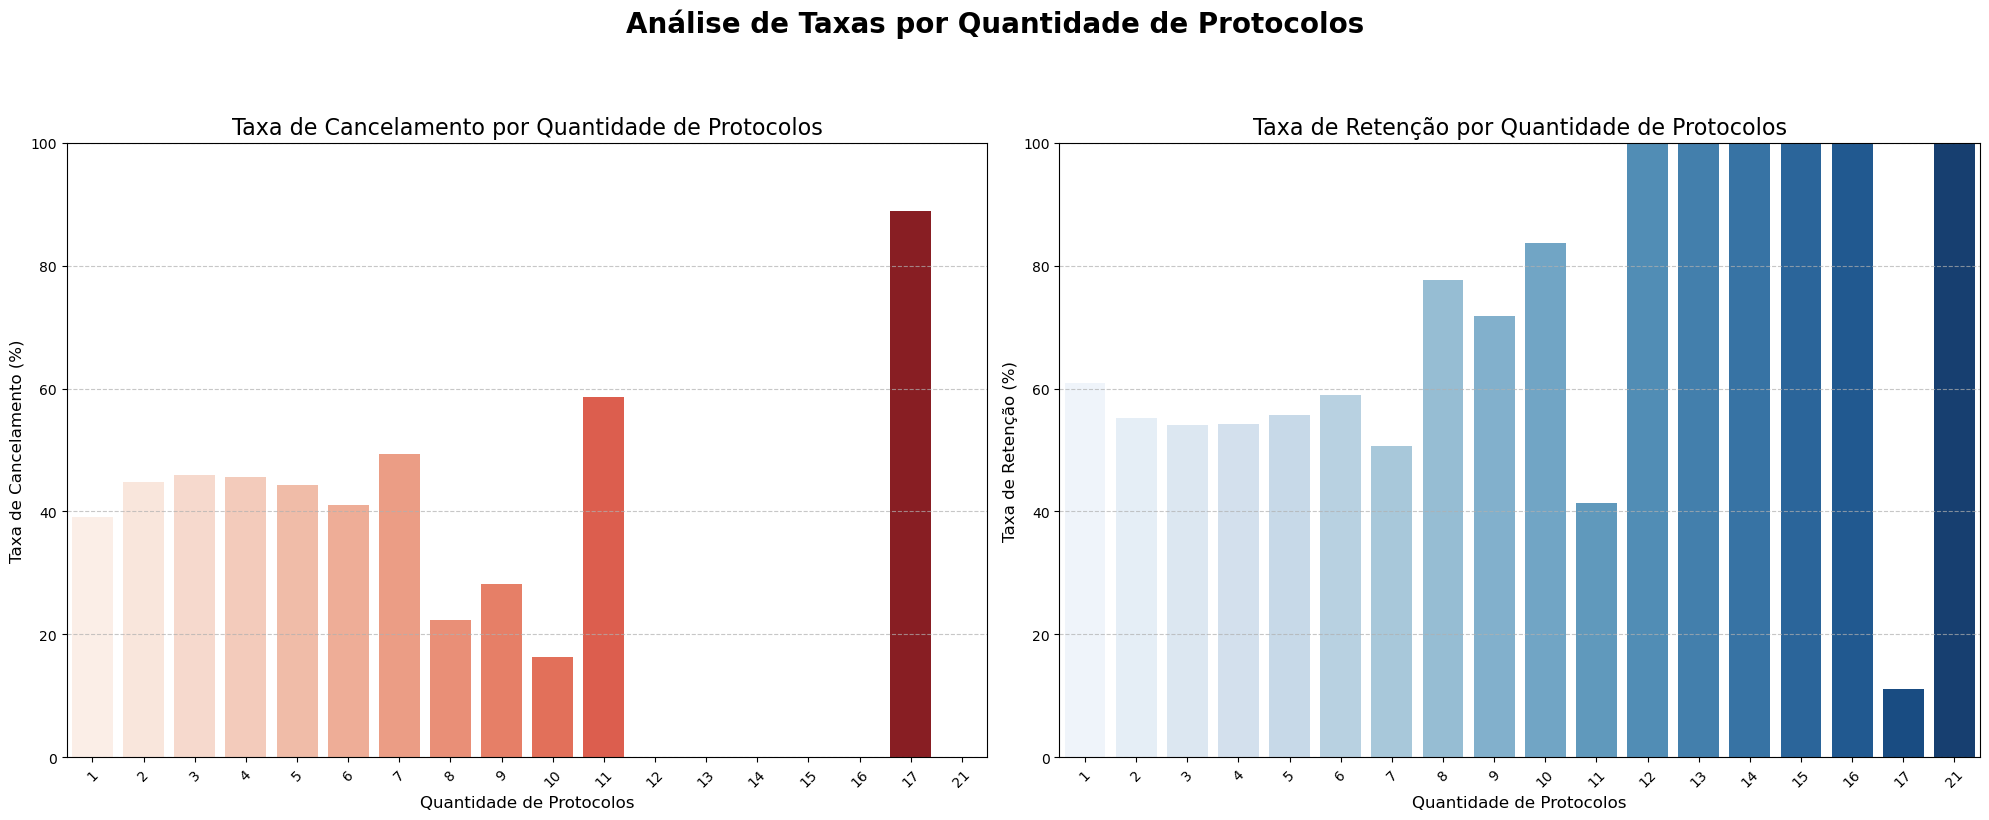

In [ ]:
# 🔸 Tabela cruzada entre quantidade de protocolos e cancelamento
tabela_protocolos = pd.crosstab(Base_Clientes_Desconexao_Detalhado['QUANTIDADE_PROTOCOLOS'], Base_Clientes_Desconexao_Detalhado['FLAG_RETIDO'])

# 🔸 Calcular taxa de cancelamento (%)
# Usar .sum(axis=1) para o total, que é mais robusto que acessar x[0] + x[1] manualmente
taxa_cancelamento_protocolos = (
    (tabela_protocolos[0] / tabela_protocolos[[0, 1]].sum(axis=1)) * 100
).reset_index()

# 🔸 Renomear colunas
taxa_cancelamento_protocolos.columns = ['Quantidade Protocolos', 'Taxa de Cancelamento (%)']

# 🔸 Ordenar
taxa_cancelamento_protocolos = taxa_cancelamento_protocolos.sort_values(by='Taxa de Cancelamento (%)')

# 🔸 Calcular taxa de retenção (%)
taxa_retencao_protocolos = (
    (tabela_protocolos[1] / tabela_protocolos[[0, 1]].sum(axis=1)) * 100
).reset_index()

# 🔸 Renomear colunas
taxa_retencao_protocolos.columns = ['Quantidade Protocolos', 'Taxa de Retenção (%)']

# 🔸 Ordenar
taxa_retencao_protocolos = taxa_retencao_protocolos.sort_values(by='Taxa de Retenção (%)')


# --- Criação da Figura com 2 Subplots ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8)) # 1 linha, 2 colunas, tamanho ajustado
fig.suptitle('Análise de Taxas por Quantidade de Protocolos', fontsize=20, fontweight='bold', y=1.02) # Título geral da figura

# --- Plotando o Gráfico de Taxa de Cancelamento no primeiro subplot (axes[0]) ---
sns.barplot(
    data=taxa_cancelamento_protocolos,
    x='Quantidade Protocolos',
    y='Taxa de Cancelamento (%)',
    palette='Reds', # Paleta Reds (do mais claro para o mais escuro)
    ax=axes[0] # Especifica o subplot
)
axes[0].set_title('Taxa de Cancelamento por Quantidade de Protocolos', fontsize=16)
axes[0].set_xlabel('Quantidade de Protocolos', fontsize=12)
axes[0].set_ylabel('Taxa de Cancelamento (%)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45) # Adiciona rotação para o eixo X
axes[0].grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid no eixo Y
axes[0].set_ylim(0, 100) # Definir o limite Y para ir de 0 a 100%


# --- Plotando o Gráfico de Taxa de Retenção no segundo subplot (axes[1]) ---
sns.barplot(
    data=taxa_retencao_protocolos,
    x='Quantidade Protocolos',
    y='Taxa de Retenção (%)',
    palette='Blues', # Paleta Blues
    ax=axes[1] # Especifica o subplot
)
axes[1].set_title('Taxa de Retenção por Quantidade de Protocolos', fontsize=16)
axes[1].set_xlabel('Quantidade de Protocolos', fontsize=12)
axes[1].set_ylabel('Taxa de Retenção (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45) # Adiciona rotação para o eixo X
axes[1].grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid no eixo Y
axes[1].set_ylim(0, 100) # Definir o limite Y para ir de 0 a 100%

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o retangulo para dar espaço ao suptitle
plt.show()